#Introduction


##TEAM BITWISE BRAINS
**CSE445**

**Sec: 08**

**Project:Phase 02**

**Task: Apply data preprocessing**

**Name: Samiul Basir Bhuiyan      ID:2111006642**

**Name: Mohammed Aman Bhuiyan     ID:2131864642**

**Name: Md Sazzad Hossain Adib    ID:2132025642**


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [193]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')
df.head()

<ipython-input-193-229f29f826be>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
df.shape

(46189, 25)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  object 
 1   EcNumber                  38978 non-null  object 
 2   CallTime                  40233 non-null  object 
 3   EmergencyArea             46189 non-null  object 
 4   TotalPatientsInEmergency  46189 non-null  object 
 5   Gender                    46188 non-null  object 
 6   Age                       46188 non-null  float64
 7   HospitalName              24239 non-null  object 
 8   Reason                    46188 non-null  object 
 9   responsetime              46184 non-null  float64
 10  EducationTitle            46188 non-null  object 
 11  InjuryType                46187 non-null  object 
 12  Cause                     46187 non-null  object 
 13  PatientStatus             46187 non-null  object 
 14  Bicycl

In [196]:
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


**Visualize the percentage of missing values for each column**

<ipython-input-197-8167fea06a43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')


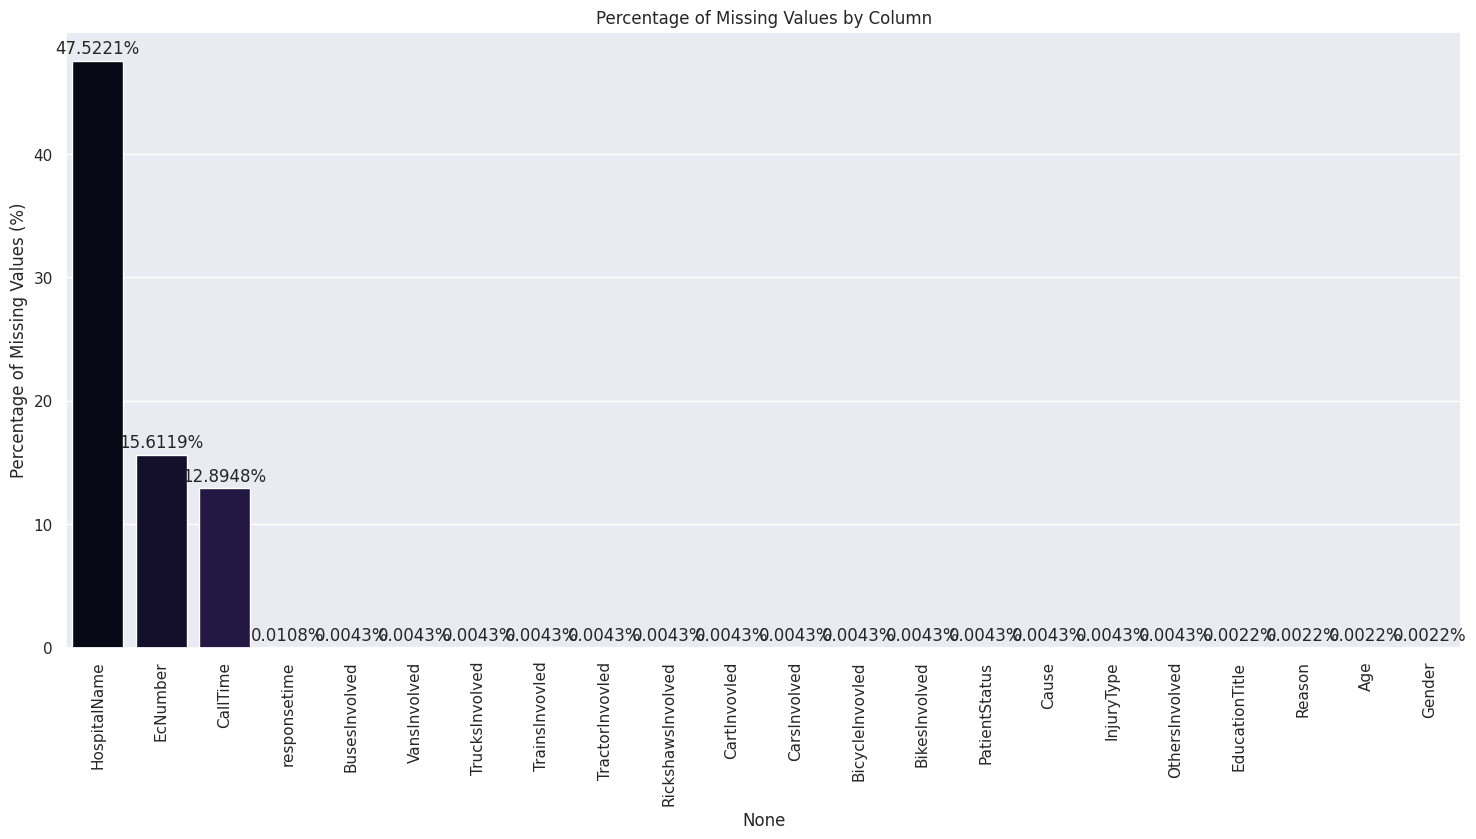

In [197]:
df_null_percentage = (df.isnull().sum() / len(df)) * 100
df_null_percentage = df_null_percentage[df_null_percentage > 0].sort_values(ascending=False)


plt.figure(figsize=(18, 8))
ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values (%)')

# Adding data labels with more decimal precision
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{height:.4f}%',  # Use 4 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

plt.show()


#Check Correlation

**Checking correlation between 'CallTime' and 'InjuryType' which show less dependancy between them.**

<ipython-input-198-7f413c7a2463>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-198-7f413c7a2463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-198-7f413c7a2463>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

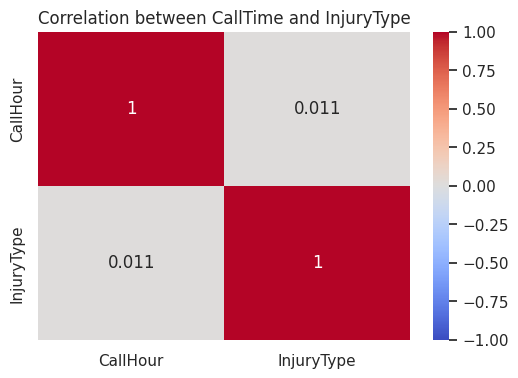

In [198]:
df_CallTime = df[['CallTime', 'InjuryType']]

# Preprocessing CallTime (convert to datetime and extract hour for correlation)
df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
df_CallTime['CallHour'] = df_CallTime['CallTime'].dt.hour  # Extract hour

# Encoding InjuryType as a numerical value
df_CallTime['InjuryType'] = df_CallTime['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_CallTime.dropna(inplace=True)

# Calculate correlation between CallHour and InjuryType
correlation = df_CallTime[['CallHour', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.show()

**Checking correlation between 'EcYear' and 'InjuryType' which show less dependancy between them.**

<ipython-input-199-c202b63a4360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes
<ipython-input-199-c202b63a4360>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes
<ipython-input-199-c202b63a4360>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

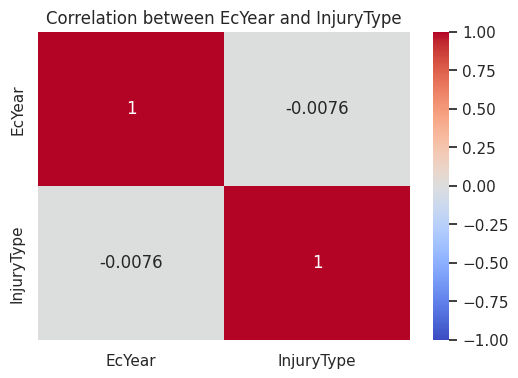

In [199]:
df_EcYear = df[['EcYear', 'InjuryType']]

# Encoding EcYear as a numerical value (2022 -> 0, 2023 -> 1, 2024 -> 2)
df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes

# Encoding InjuryType as a numerical value
df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_EcYear.dropna(inplace=True)

# Calculate correlation between EcYear and InjuryType
correlation = df_EcYear[['EcYear', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.show()

# Data Cleaning

**Dropped 'HospitalName','EcNumber','CallTime','EcYear'**

1. Drop the HospitalName & EcNumber coloumn as it is less important and have huge NULL values
2. By analysing the dataset the values of EcYear & CallTime has less relation to Target variable 'InjuryType'

In [200]:
df.drop(['HospitalName','EcNumber','CallTime','EcYear'], axis=1, inplace=True)

**Dropped rows which has 2 or less NULL values**

In [201]:
df = df.dropna(thresh=len(df.columns) - 2)

**Fill 'responsetime' columns NaN values with Mean**

In [202]:
mean_responsetime = int(df['responsetime'].mean())
df['responsetime'].fillna(mean_responsetime, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46187 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46187 non-null  object 
 1   TotalPatientsInEmergency  46187 non-null  object 
 2   Gender                    46187 non-null  object 
 3   Age                       46187 non-null  float64
 4   Reason                    46187 non-null  object 
 5   responsetime              46187 non-null  float64
 6   EducationTitle            46187 non-null  object 
 7   InjuryType                46187 non-null  object 
 8   Cause                     46187 non-null  object 
 9   PatientStatus             46187 non-null  object 
 10  BicycleInvovled           46187 non-null  float64
 11  BikesInvolved             46187 non-null  float64
 12  BusesInvolved             46187 non-null  float64
 13  CarsInvolved              46187 non-null  float64
 14  CartInvovle

<ipython-input-202-1d70ce1c68f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['responsetime'].fillna(mean_responsetime, inplace=True)
<ipython-input-202-1d70ce1c68f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responsetime'].fillna(mean_responsetime, inplace=True)


In [203]:
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


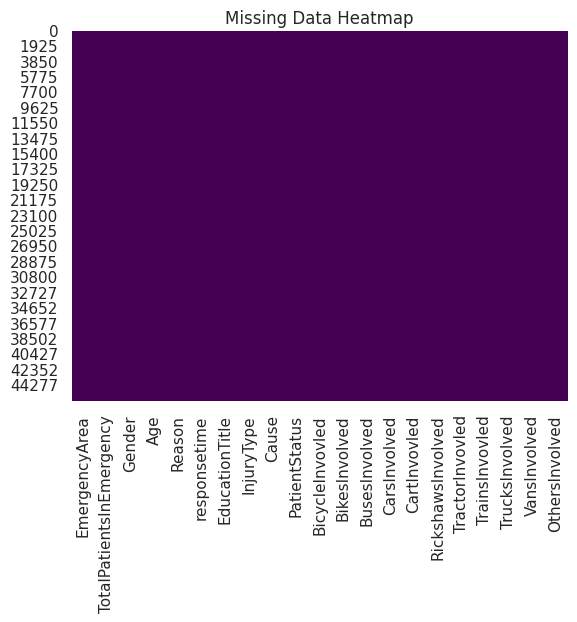

In [204]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [205]:
df.shape

(46187, 21)

**Dropping duplicate coloumns**

In [206]:
df = df.drop_duplicates()
df.shape

(46159, 21)

In [207]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')

<ipython-input-207-86f18bb0612b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')


#Encoding Categorical Features

### Emergency Area encoded with Label Encoding.

In [208]:
le = LabelEncoder()
df['EmergencyArea'] = le.fit_transform(df['EmergencyArea'])
df['EmergencyArea']

,EmergencyArea
0,24929
1,18187
2,24347
3,15514
4,34419
...,...
46184,17382
46185,10602
46186,22077
46187,1181


###Gender encoded with One Hot Encoding.

In [209]:
encoder = OneHotEncoder(sparse_output=False)
arr = encoder.fit_transform(df[['Gender']])

en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

en_df.index = df.index

df = pd.concat([df, en_df], axis=1)
df.drop(['Gender'], axis=1, inplace=True)


<ipython-input-210-beccb475d14e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)


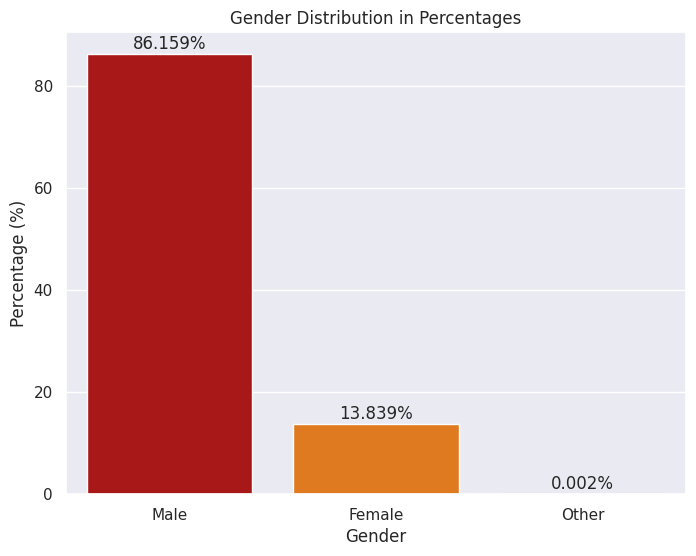

In [210]:
total_entries_gender = len(df)

gender_percentage = (df[["Male", "Female", "Other"]].sum() / total_entries_gender) * 100

gender_colors = ['#c10000', '#ff7800','#1330bf']


plt.figure(figsize=(8, 6))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)


for i, val in enumerate(gender_percentage.values):
    plt.text(i, val + 1, f'{val:.3f}%', ha='center', fontsize=12)

plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender Distribution in Percentages')

plt.show()

###Reason encoded with Label Encoding.

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Reason'] = le.fit_transform(df['Reason'])
df['Reason']

,Reason
0,11684
1,15523
2,19244
3,15492
4,20810
...,...
46184,9349
46185,4413
46186,18909
46187,4263


###Education Title encoded with Ordinal Encoding.

In [212]:
edu_order = [['Illetrate','Primary', 'Matric','Middle','Intermediate','Graduation','Masters','PHD']]

ordinal_encoder = OrdinalEncoder(categories=edu_order)

df['EducationTitle_Ordinal'] = ordinal_encoder.fit_transform(df[['EducationTitle']])

df.drop(['EducationTitle'], axis=1, inplace=True)


###Injury Type encoded with Ordinal Encoding.

In [213]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType_Ordinal'] = ordinal_encoder.fit_transform(df[['InjuryType']])

df.drop(['InjuryType'], axis=1, inplace=True)


<ipython-input-214-3483d2543e54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')


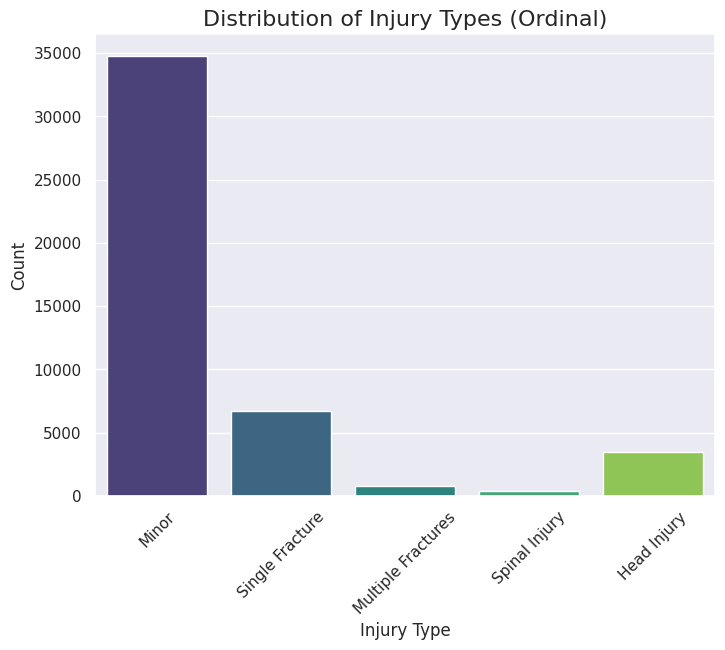

In [214]:
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

encoded_values = df['InjuryType_Ordinal']

injury_labels = [injury_mapping[val] for val in encoded_values]

plt.figure(figsize=(8, 6))
sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')

plt.title('Distribution of Injury Types (Ordinal)', fontsize=16)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

###Cause encoded with Label Encoding.

In [215]:
le = LabelEncoder()
df['Cause'] = le.fit_transform(df['Cause'])

###PatientStatus encoded with Ordinal Encoding

In [216]:
Pstatus_order = [['Alive & unstable', 'Alive & stable', 'Dead']]

ordinal_encoder = OrdinalEncoder(categories=Pstatus_order)

df['Patient_Status_Ordinal'] = ordinal_encoder.fit_transform(df[['PatientStatus']])

df.drop(['PatientStatus'], axis=1, inplace=True)


<ipython-input-217-ee143b32b665>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Pstatus_labels, order=Pstatus_order[0], palette='viridis')


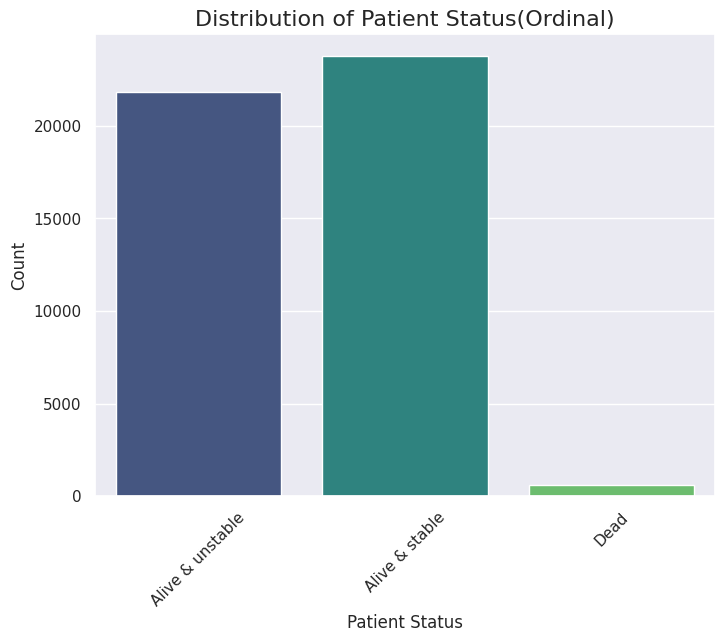

In [217]:
Pstatus_mapping = {0: 'Alive & stable', 1: 'Alive & unstable', 2: 'Dead'}

encoded_values = df['Patient_Status_Ordinal']

Pstatus_labels = [Pstatus_mapping[val] for val in encoded_values]

plt.figure(figsize=(8, 6))
sns.countplot(x=Pstatus_labels, order=Pstatus_order[0], palette='viridis')

plt.title('Distribution of Patient Status(Ordinal)', fontsize=16)
plt.xlabel('Patient Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  float64
 2   Age                       46159 non-null  float64
 3   Reason                    46159 non-null  int64  
 4   responsetime              46159 non-null  float64
 5   Cause                     46159 non-null  int64  
 6   BicycleInvovled           46159 non-null  float64
 7   BikesInvolved             46159 non-null  float64
 8   BusesInvolved             46159 non-null  float64
 9   CarsInvolved              46159 non-null  float64
 10  CartInvovled              46159 non-null  float64
 11  RickshawsInvolved         46159 non-null  float64
 12  TractorInvovled           46159 non-null  float64
 13  TrainsInvovled            46159 non-null  float64
 14  TrucksInvol

#Outlier Remove

###Draw Box polt

<Axes: xlabel='responsetime'>

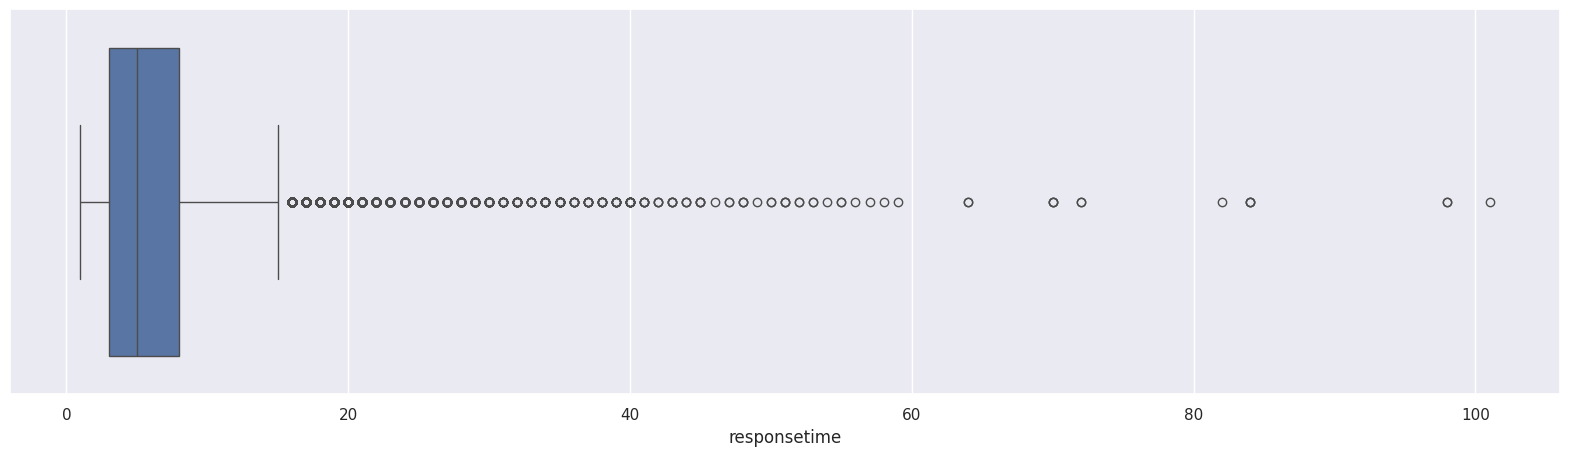

In [219]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

In [220]:
x = 'responsetime'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(1.0, 101.0, 3.0, 5.0, 8.0, 5.0, -4.5, 15.5)

In [221]:
df.shape

(46159, 23)

In [222]:
df = df[df['responsetime'] < max_range]
df.shape

(43894, 23)

<Axes: xlabel='responsetime'>

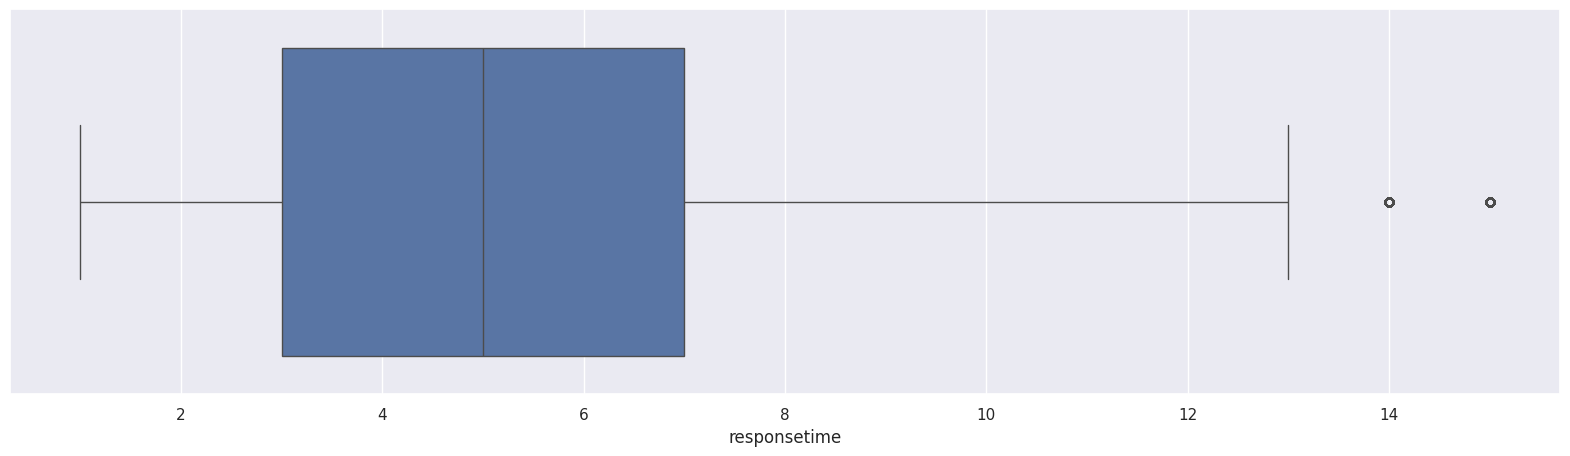

In [223]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

<Axes: xlabel='Age'>

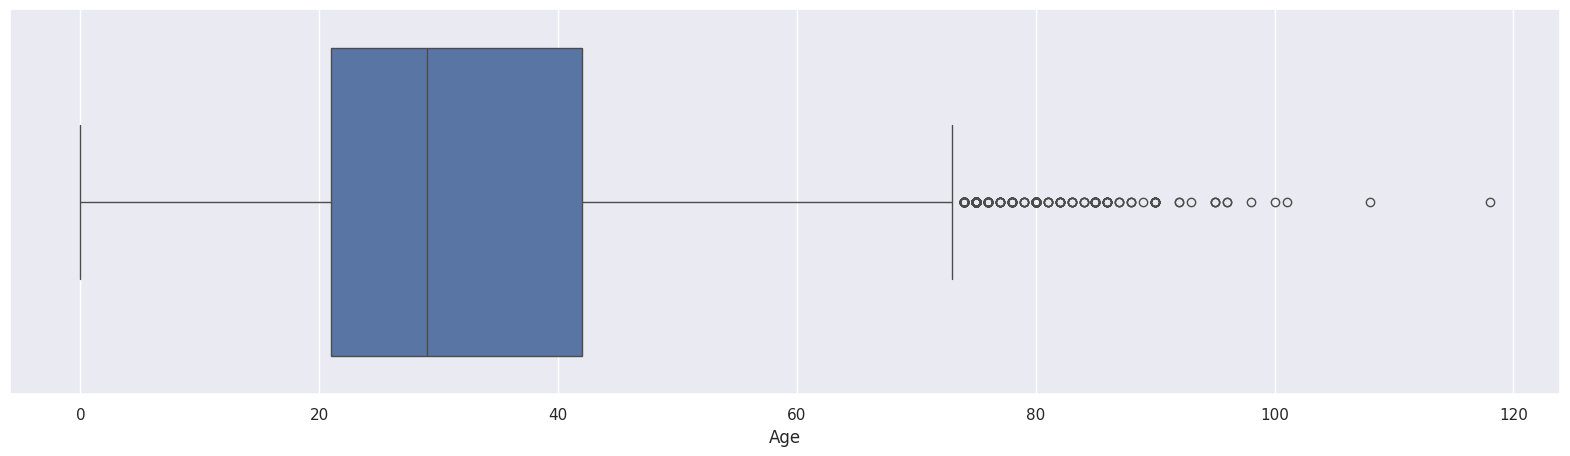

In [224]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

In [225]:
x = 'Age'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(0.0, 118.0, 21.0, 29.0, 42.0, 21.0, -10.5, 73.5)

In [226]:
df.shape

(43894, 23)

In [227]:
df = df[df['Age'] < max_range]
df.shape

(43453, 23)

<Axes: xlabel='Age'>

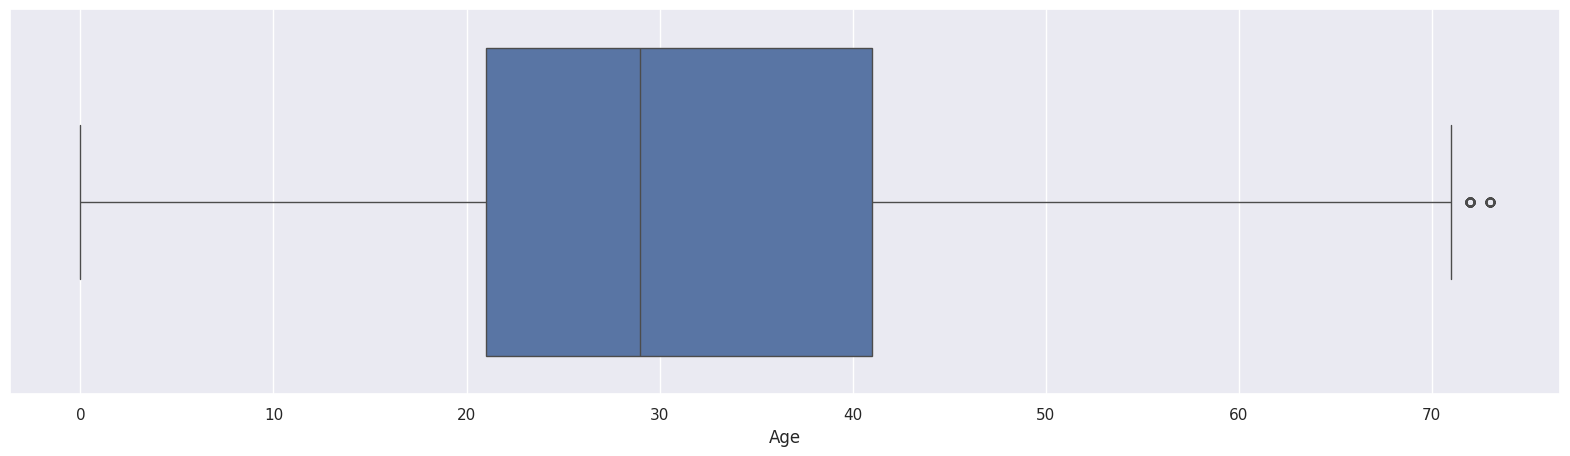

In [228]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

#Applying Mean Normalization for Feature Scaling

###Normalization for Reason

<Axes: xlabel='InjuryType_Ordinal', ylabel='Reason'>

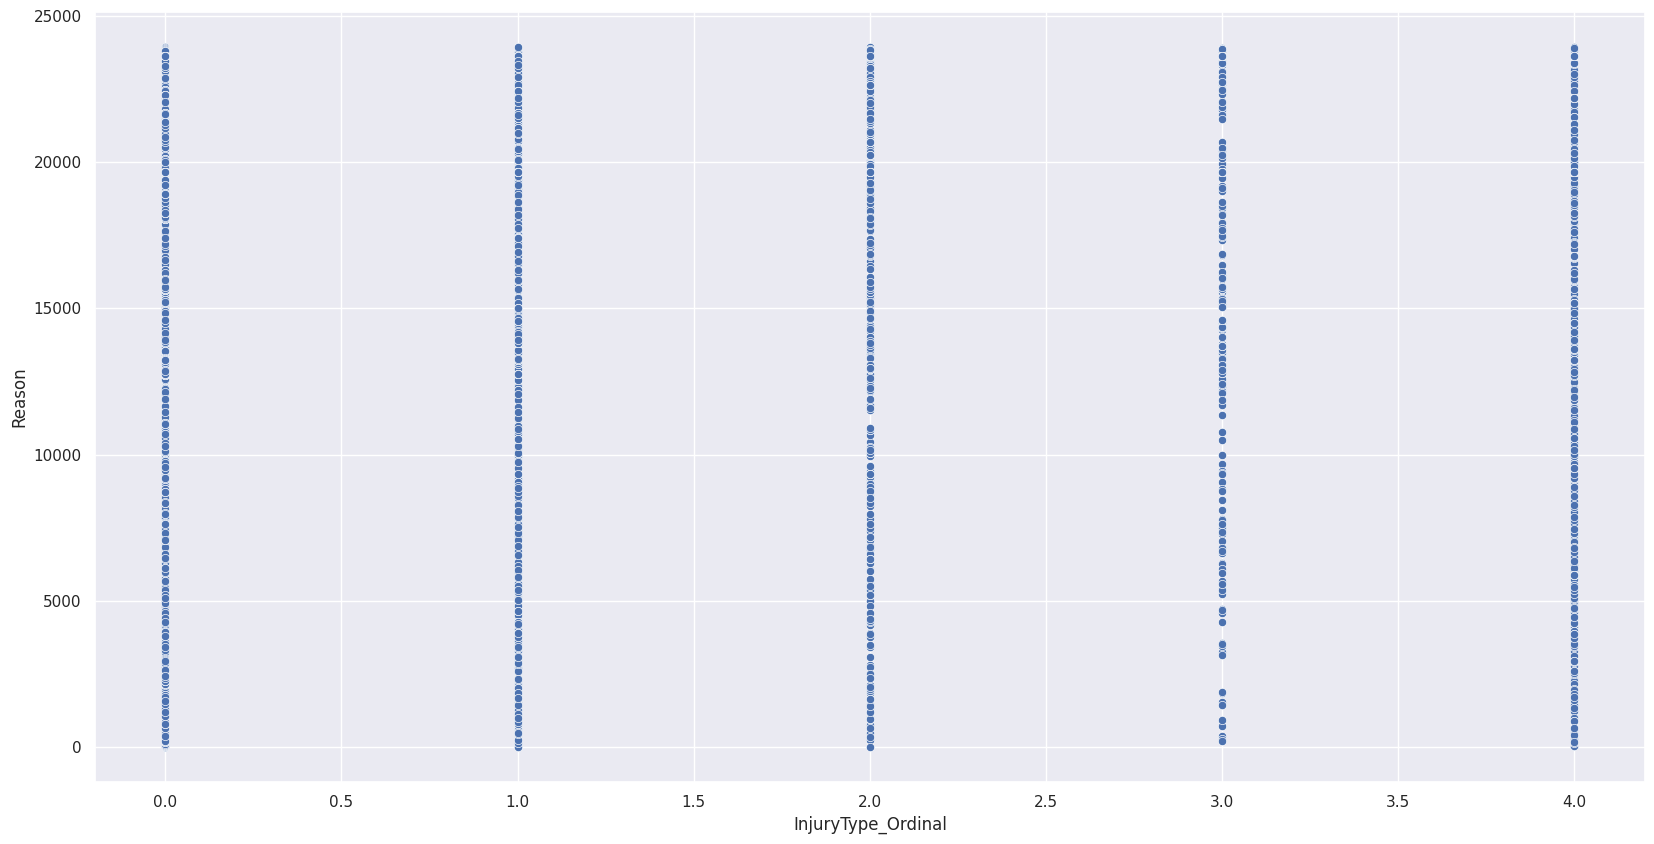

In [229]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['Reason'])

In [230]:
df['Reason']  = (df['Reason'] - df['Reason'].mean())/df['Reason'].max()

<Axes: xlabel='InjuryType_Ordinal', ylabel='Reason'>

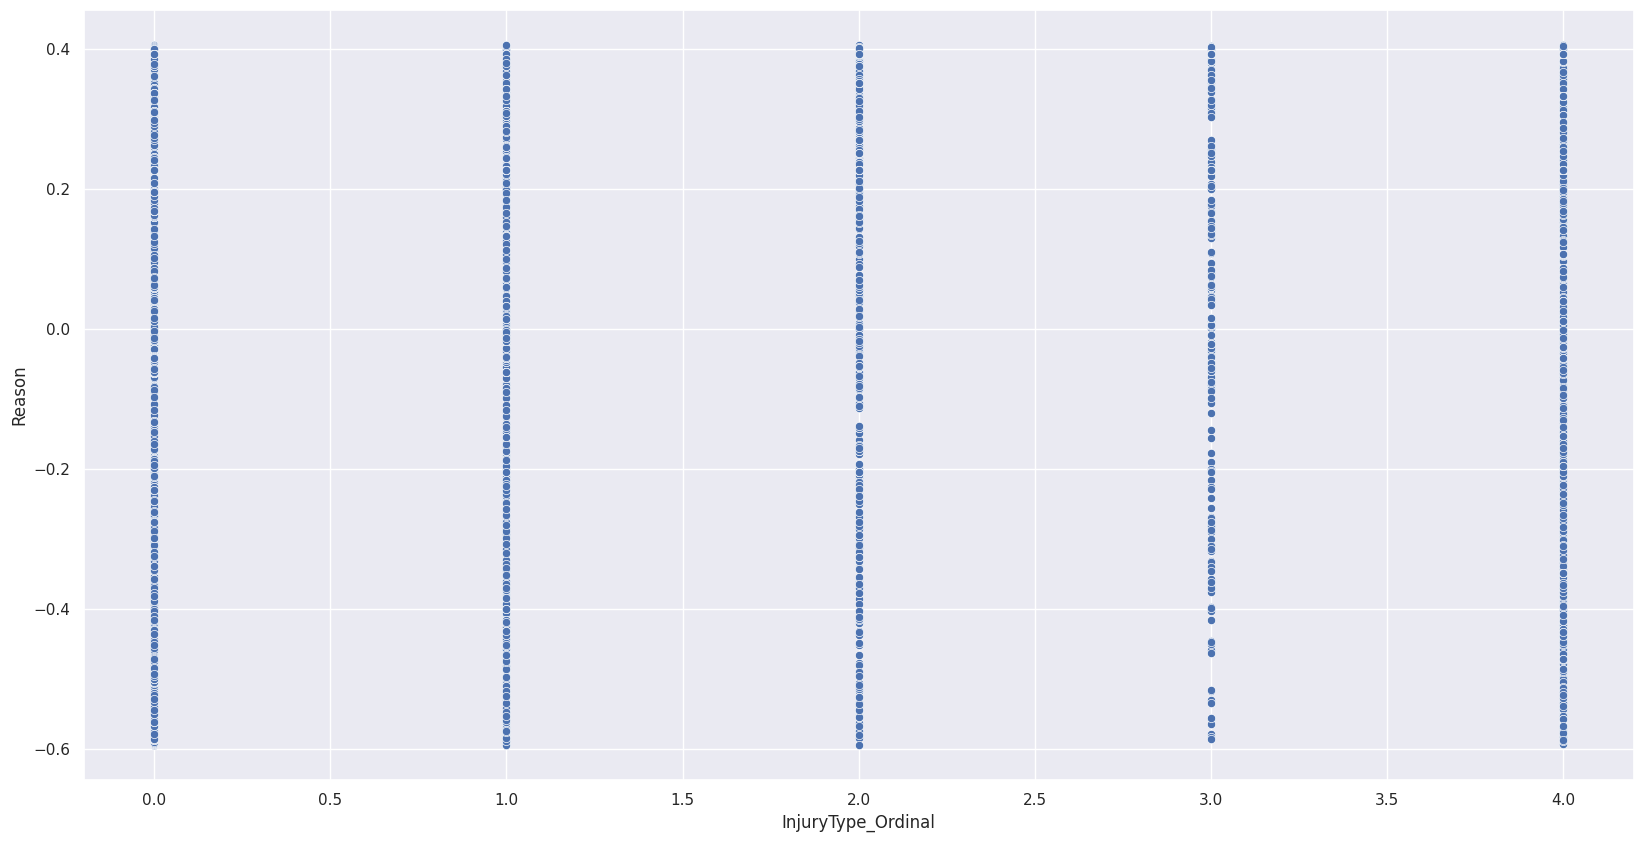

In [231]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['Reason'])

###Normalization for Emergency Area

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

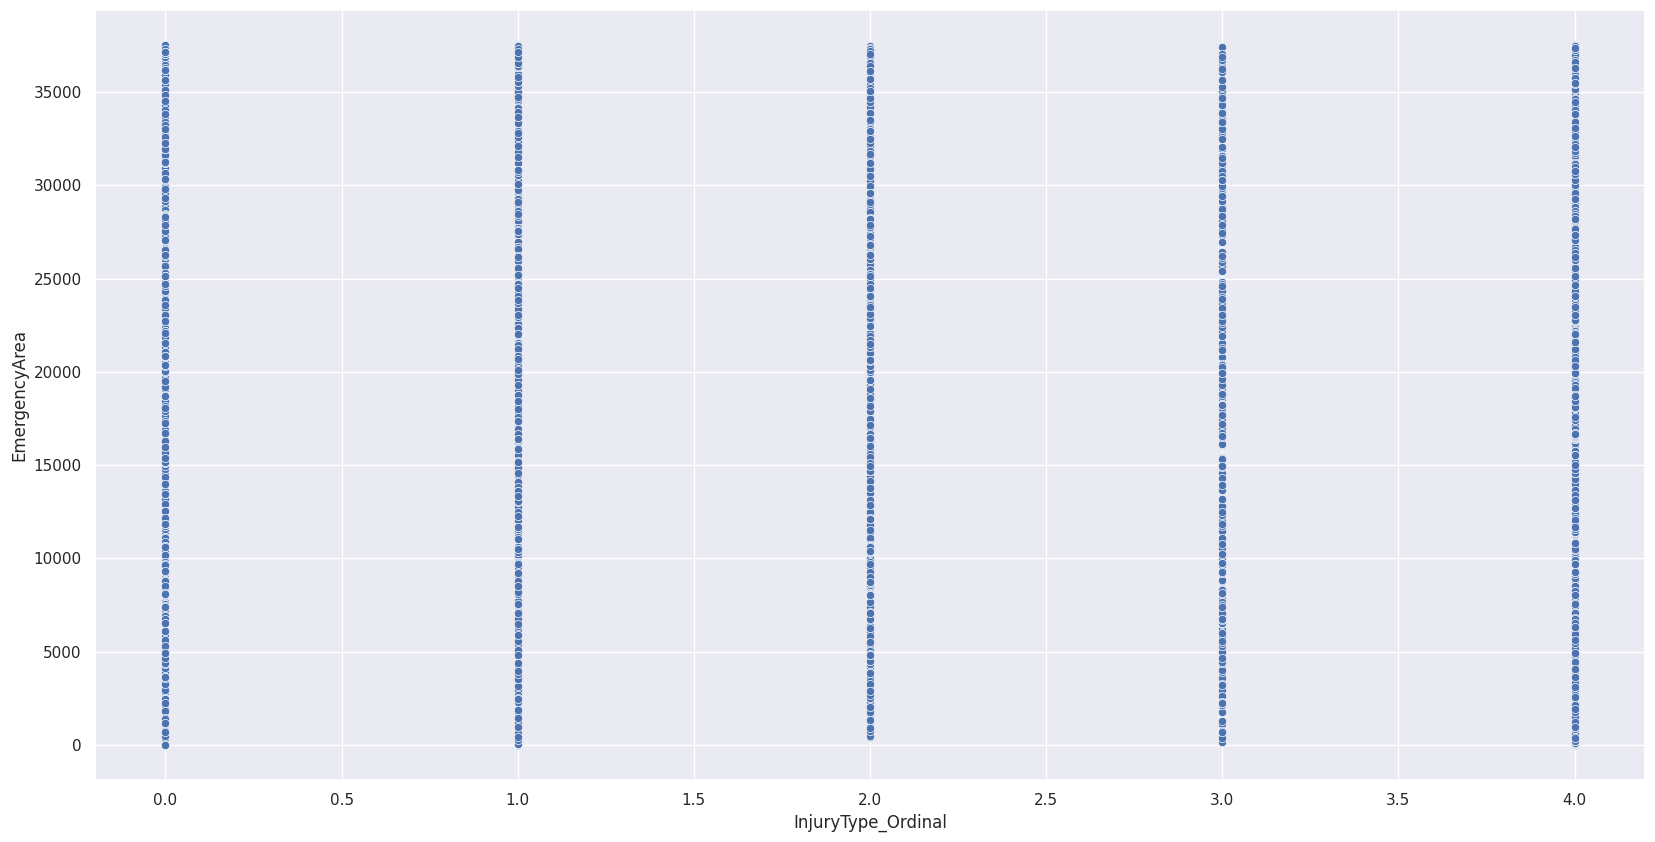

In [232]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

In [233]:
df['EmergencyArea']  = (df['EmergencyArea'] - df['EmergencyArea'].mean())/df['EmergencyArea'].max()

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

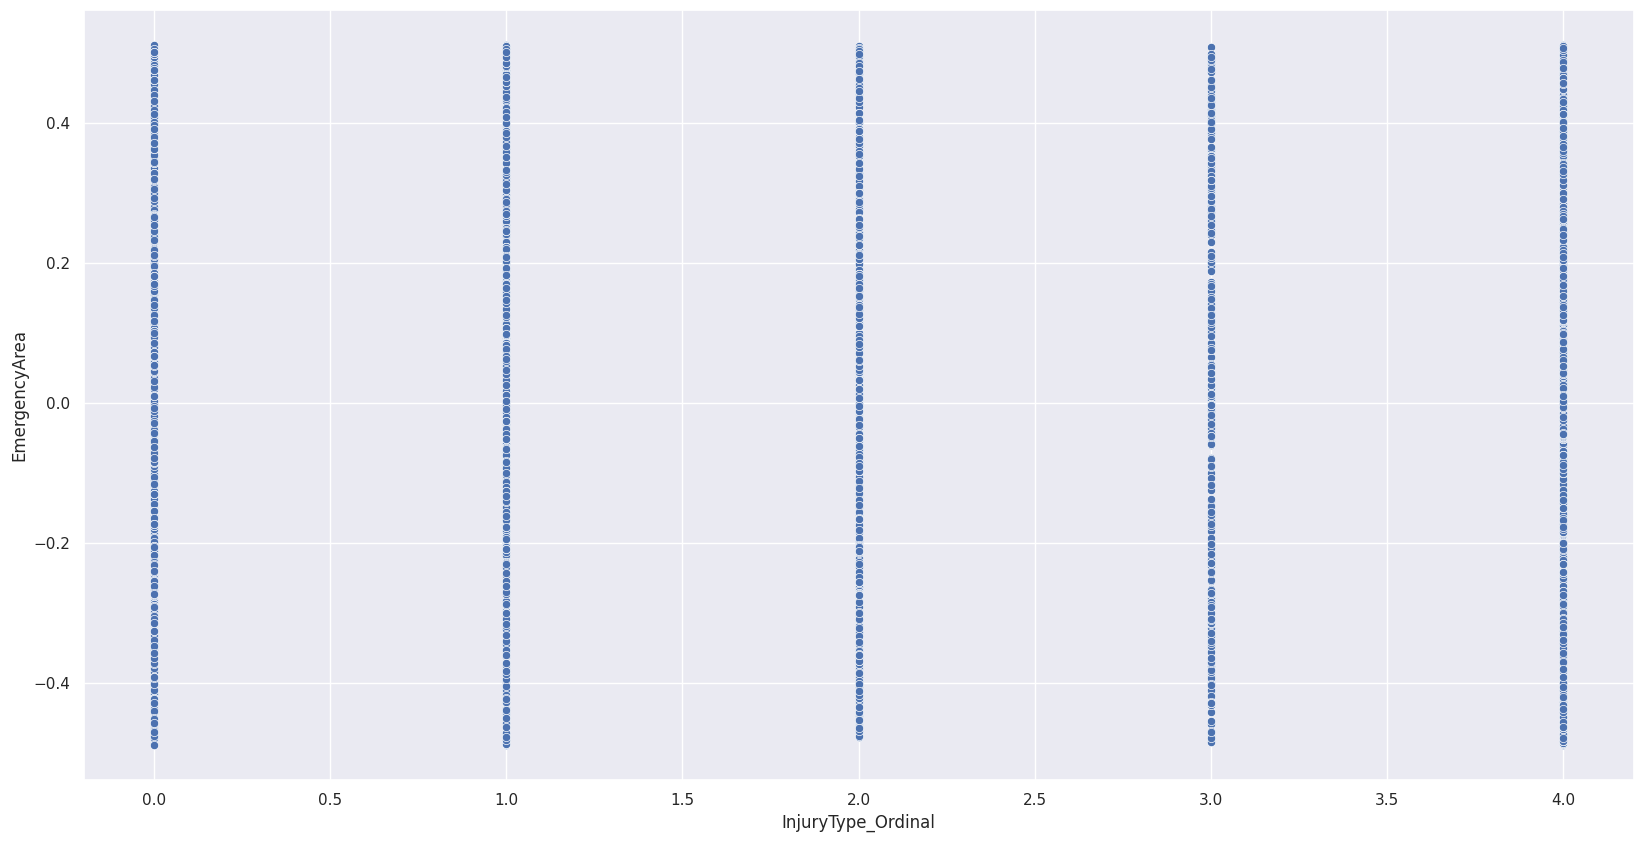

In [234]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

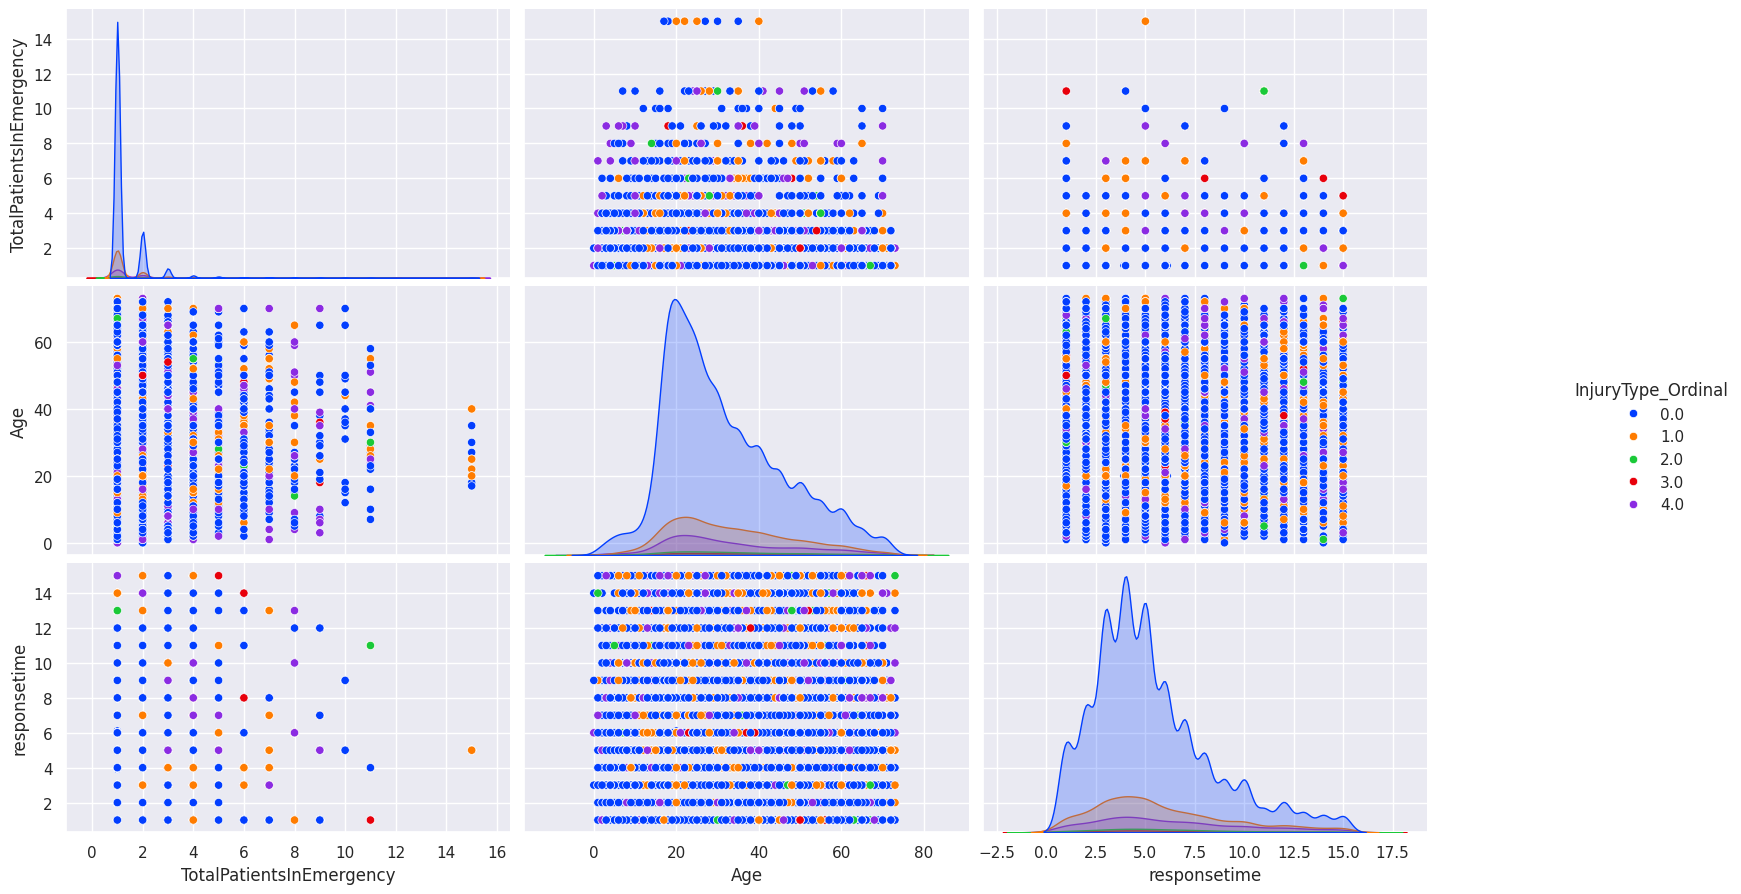

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt


pairplot = sns.pairplot(df[['InjuryType_Ordinal', 'TotalPatientsInEmergency', 'Age', 'responsetime']],
                         hue='InjuryType_Ordinal',
                         palette='bright',
                         height=3)


plt.subplots_adjust(top=0.9)
plt.gcf().set_size_inches(18, 10)

plt.show()



Categorical Columns: ['TotalPatientsInEmergency', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Female', 'Male', 'Other', 'EducationTitle_Ordinal', 'InjuryType_Ordinal', 'Patient_Status_Ordinal']


<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-236-06f653d463de>:26: UserWarning: FixedFormatter should only be used together with FixedLocato

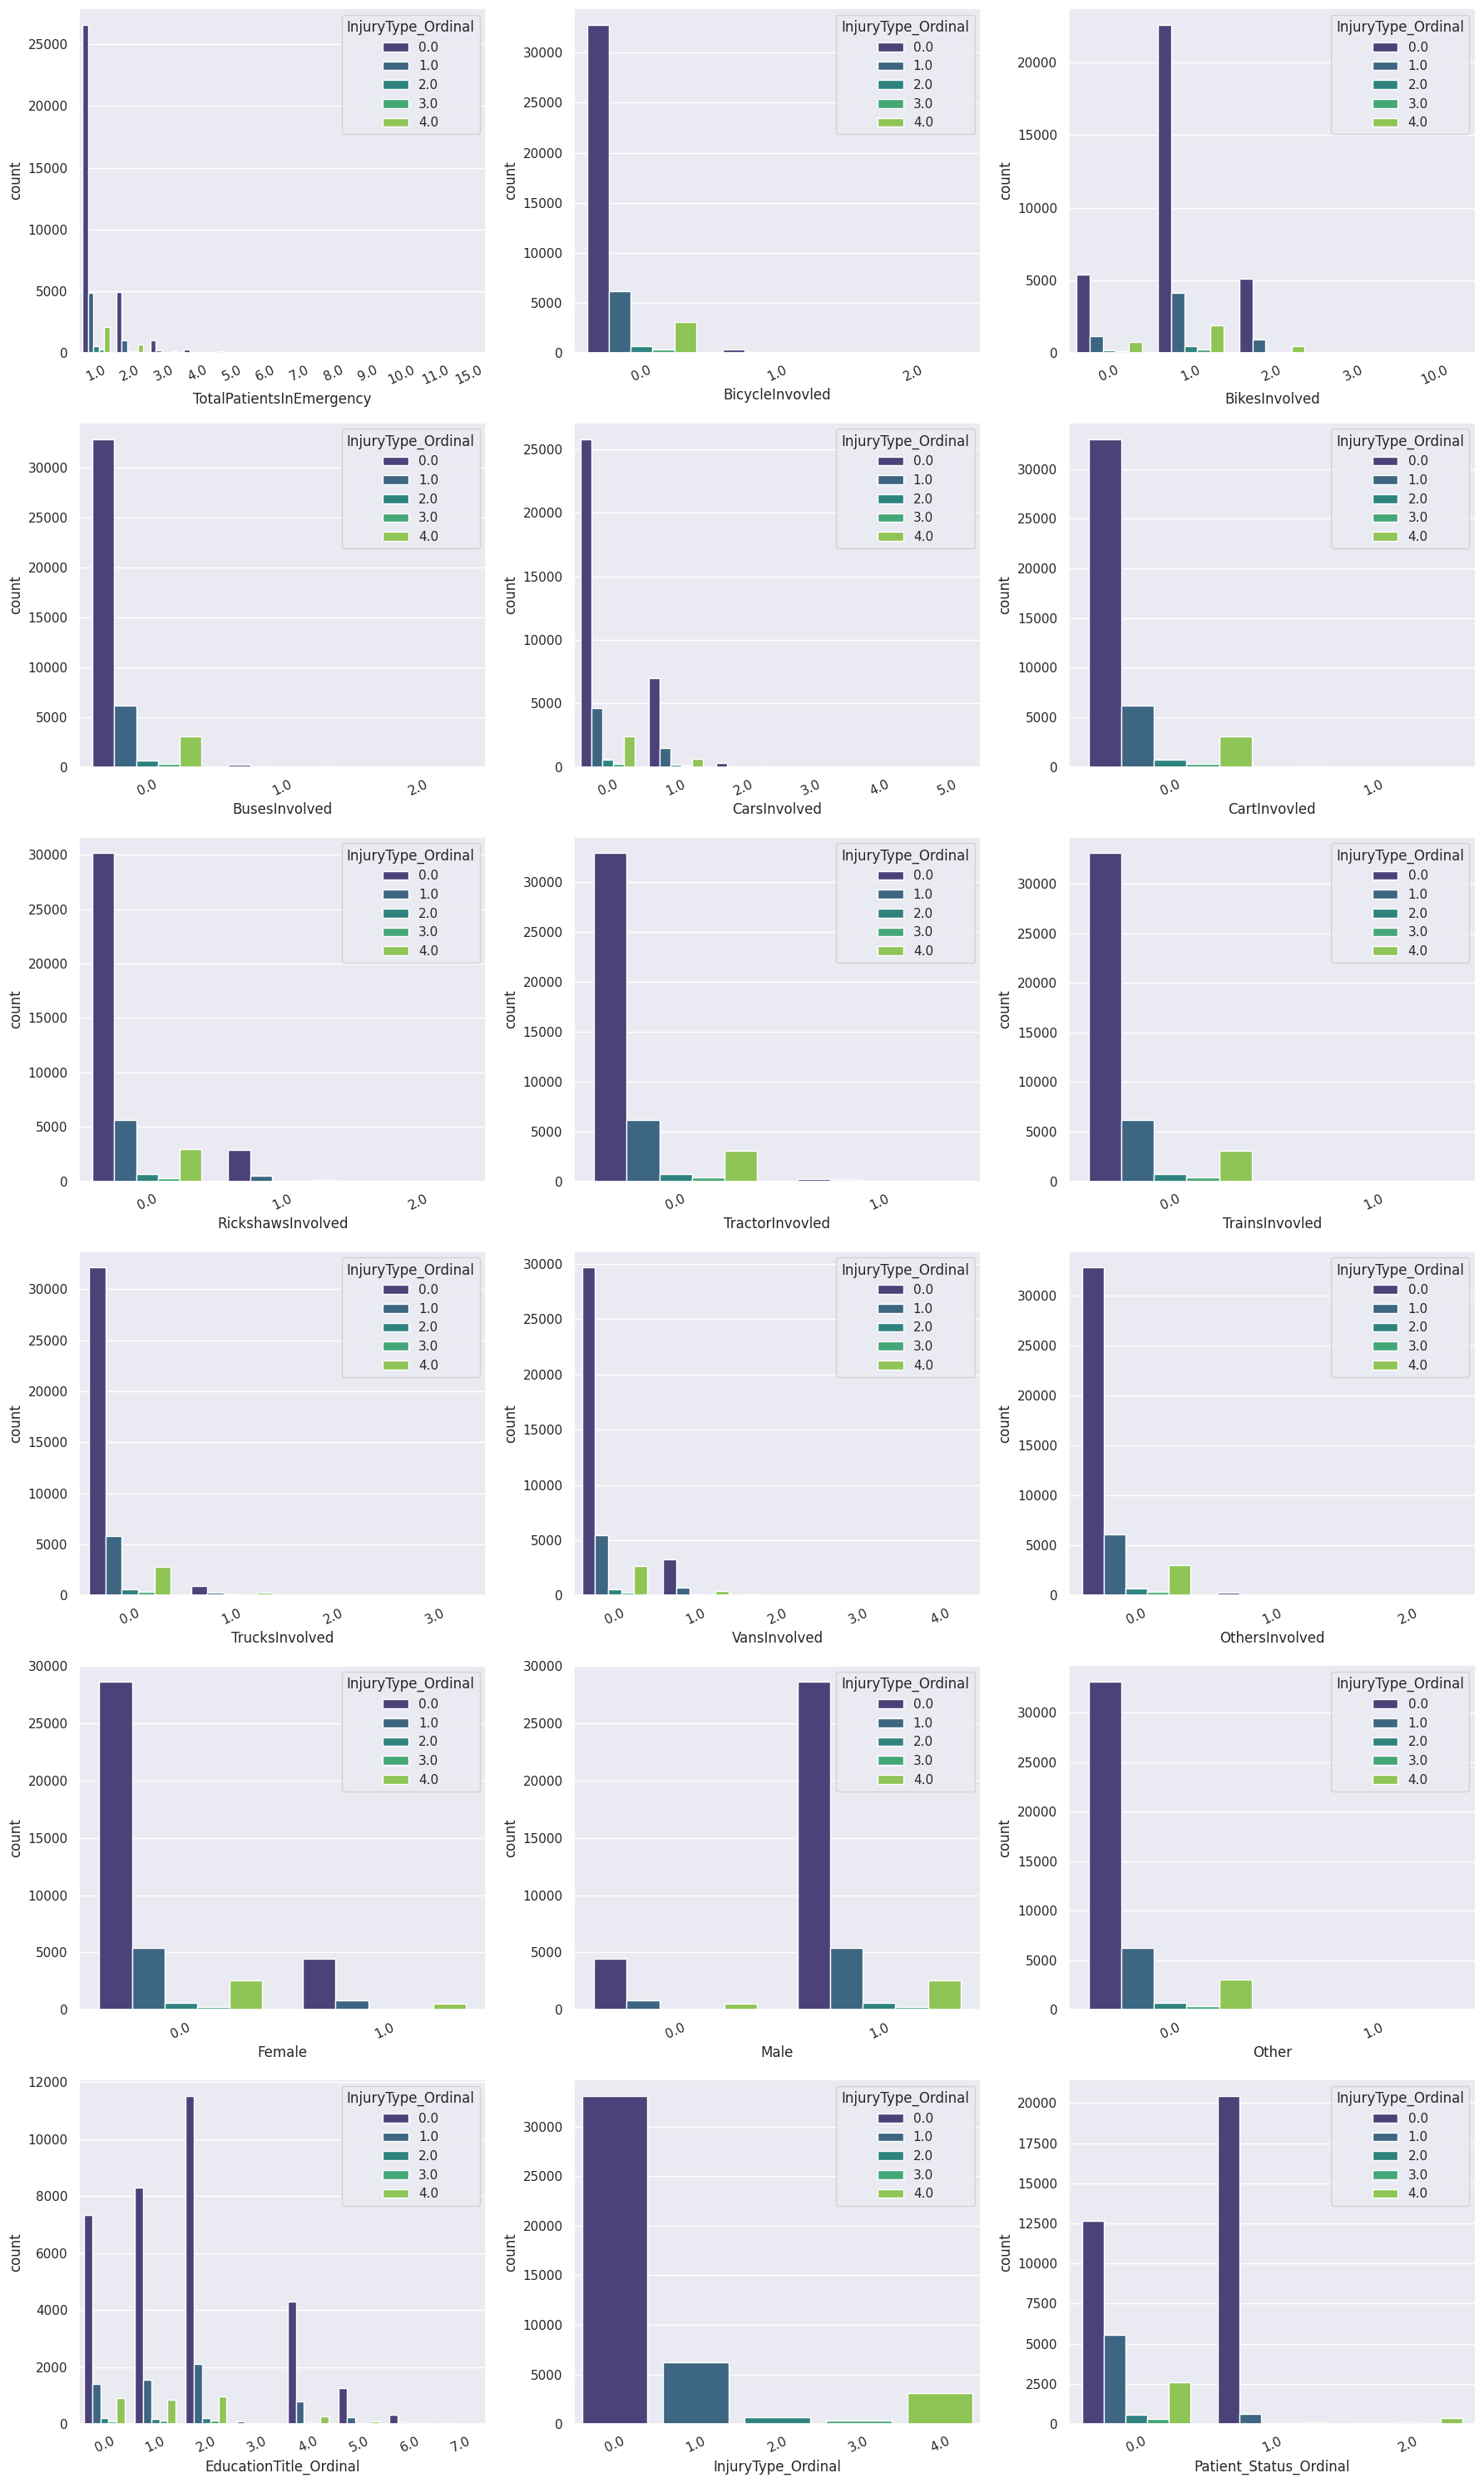

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns with fewer than 15 unique values
categories = [col for col in df.columns if (df[col].dtype == 'float64' and df[col].nunique() < 15)]
print("Categorical Columns:", categories)

# Define number of rows and columns based on the number of categories
num_plots = len(categories)
rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 5))

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define a custom color palette (using 'viridis' as an example)
custom_palette = sns.color_palette("viridis", n_colors=df['InjuryType_Ordinal'].nunique())

# Iterate through categorical columns and create count plots
for i, col in enumerate(categories):
    # Create countplot for each categorical column, with 'InjuryType_Ordinal' hue and custom palette
    sns.countplot(data=df, x=col, hue="InjuryType_Ordinal", ax=axes[i], palette=custom_palette)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.tight_layout()
plt.show()


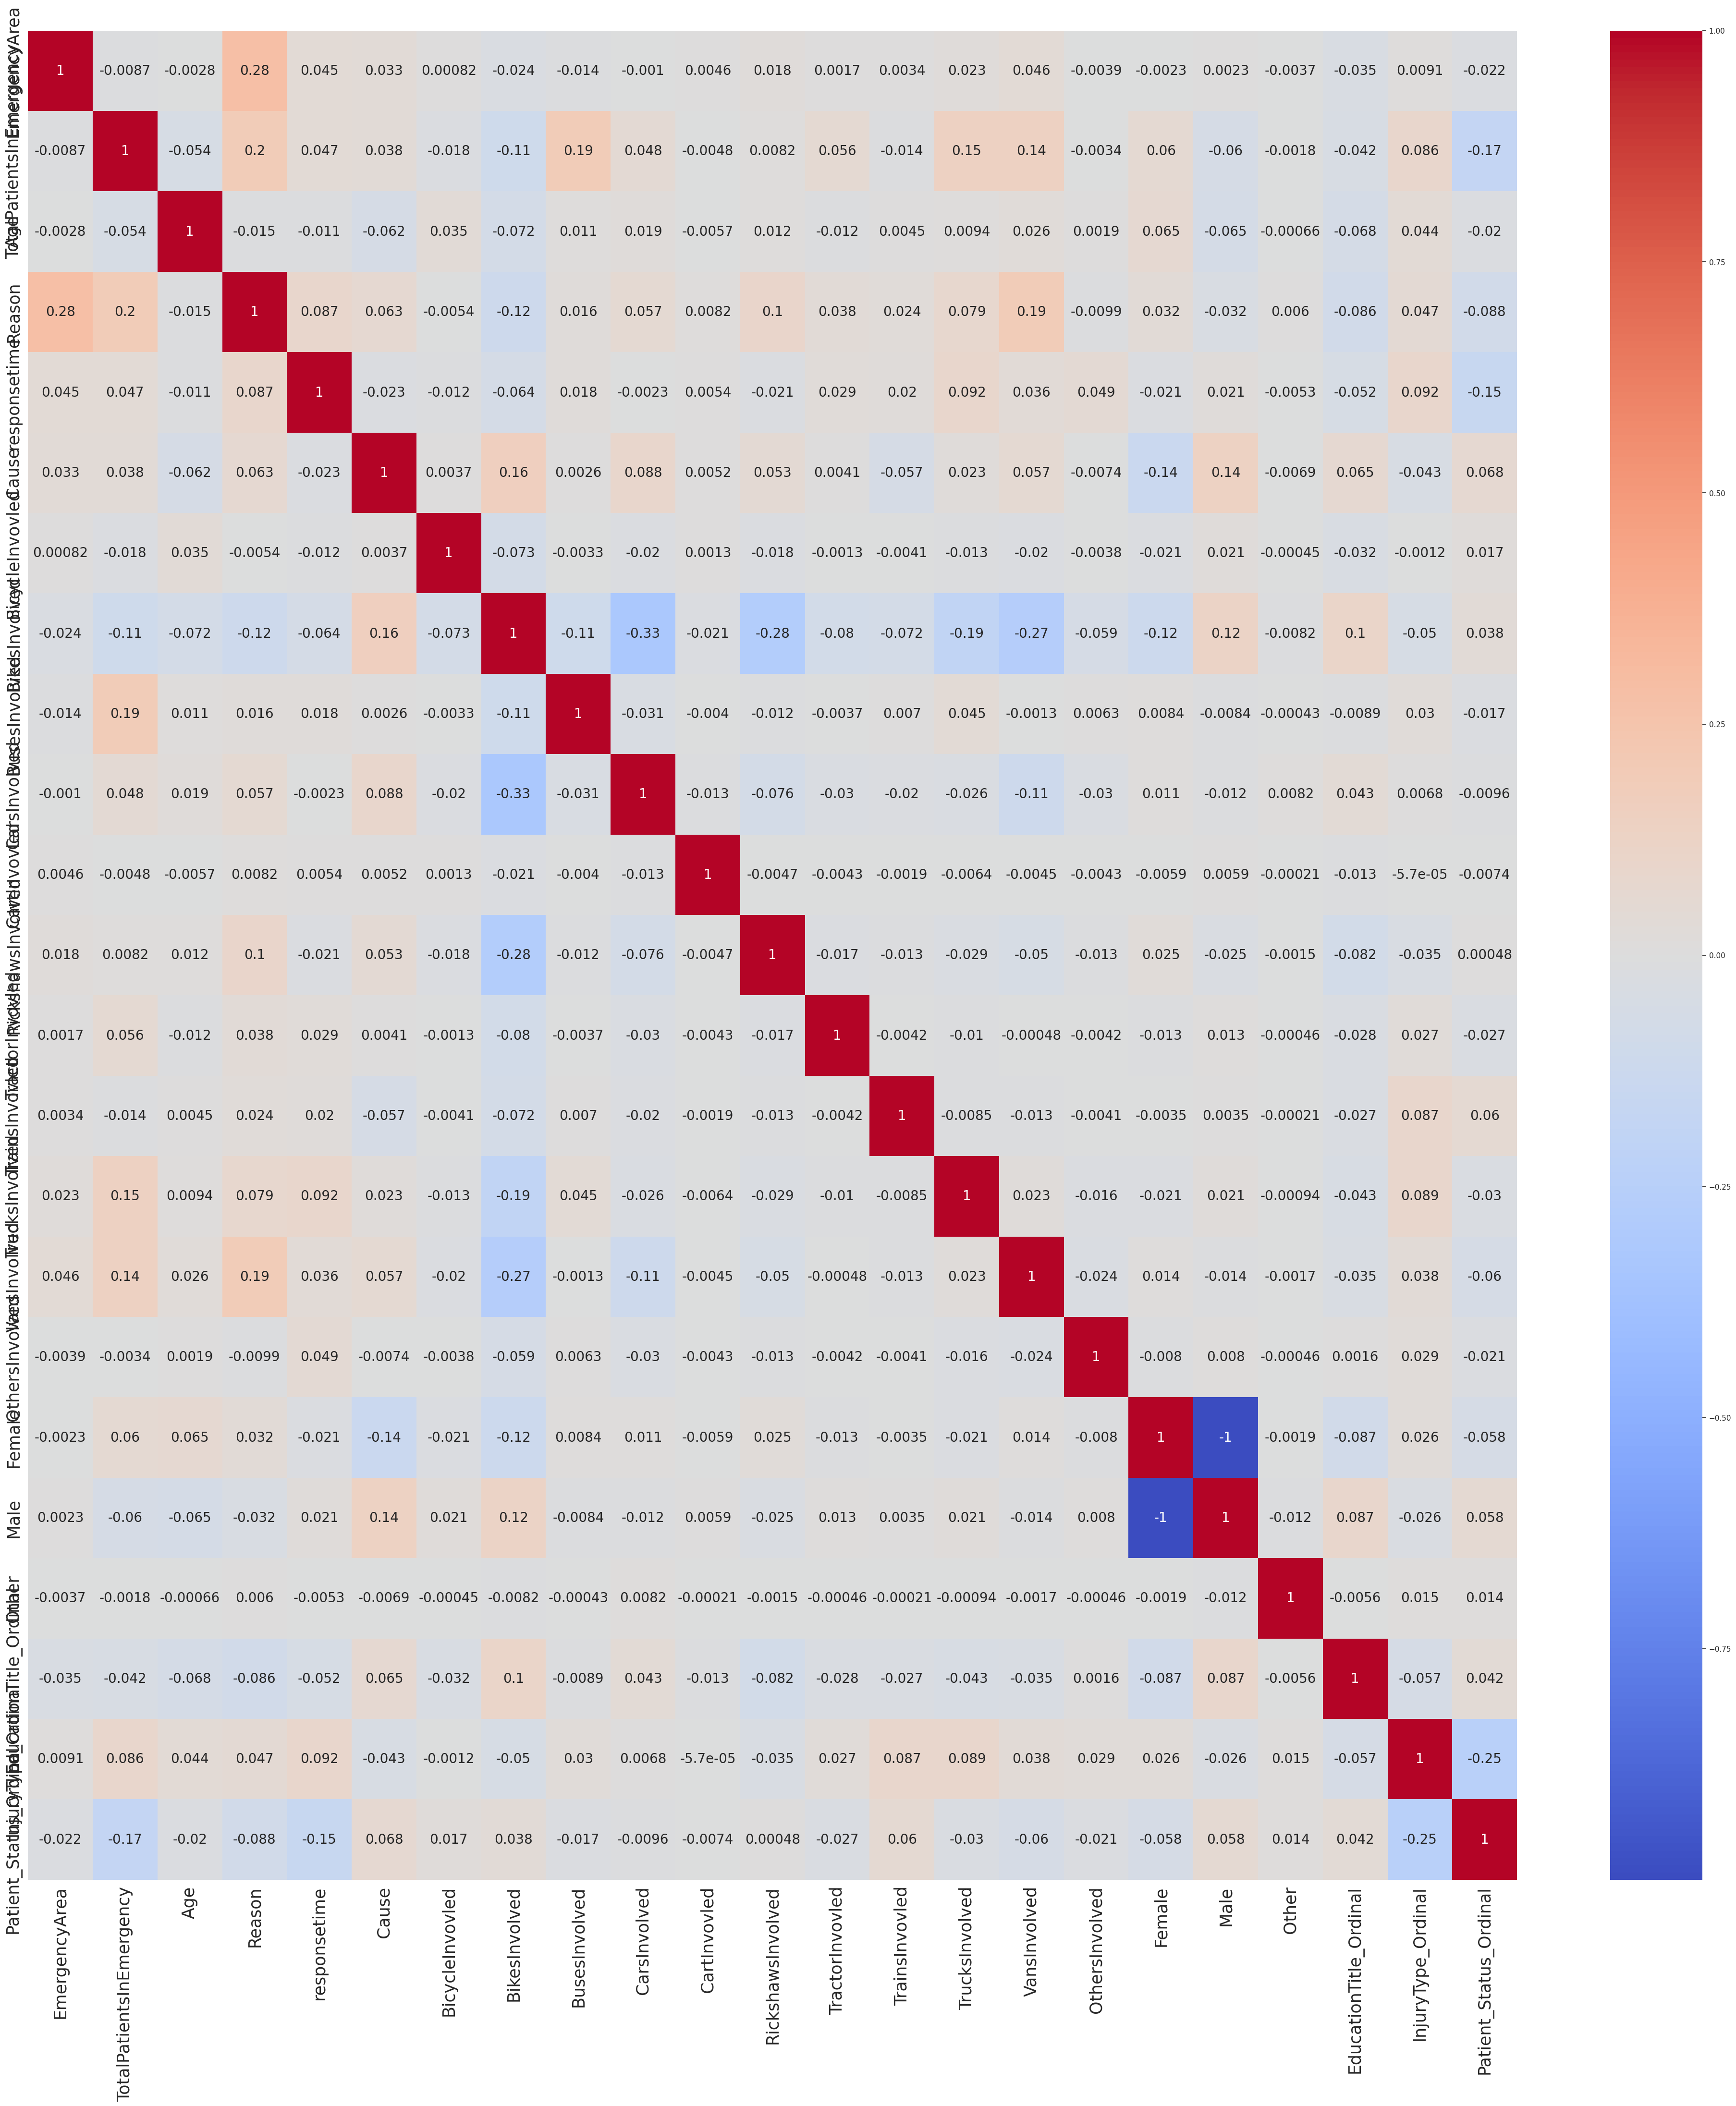

In [237]:
numeric_df = df.select_dtypes(include=[np.number])

sns.set(font_scale=1)
plt.subplots(figsize=(50, 50))

heat_plot = sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm', annot_kws={'size': 20})

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

#Data Partitioning: Implementing Train-Test Split

In [238]:
x = df.drop(columns=['InjuryType_Ordinal'])

y = df['InjuryType_Ordinal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (34762, 22)
x_test shape: (8691, 22)
y_train shape: (34762,)
y_test shape: (8691,)


#Assignment----2

##Target Variable Injury Type

###Apply Logistic Regression


####Train Logistic Regression model on the train set

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [241]:
log_reg.score(x_train, y_train)

0.7622979115125712

In [242]:
log_reg.score(x_test, y_test)

0.7576803589920608

####Test the trained model on the test set

In [243]:
predicted_result = log_reg.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

In [244]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


#####a. Accuracy

In [245]:
accuracy = accuracy_score(y_test, predicted_result)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.76


#####b. Confusion Matrix

In [246]:
conf_matrix = confusion_matrix(y_test, predicted_result)

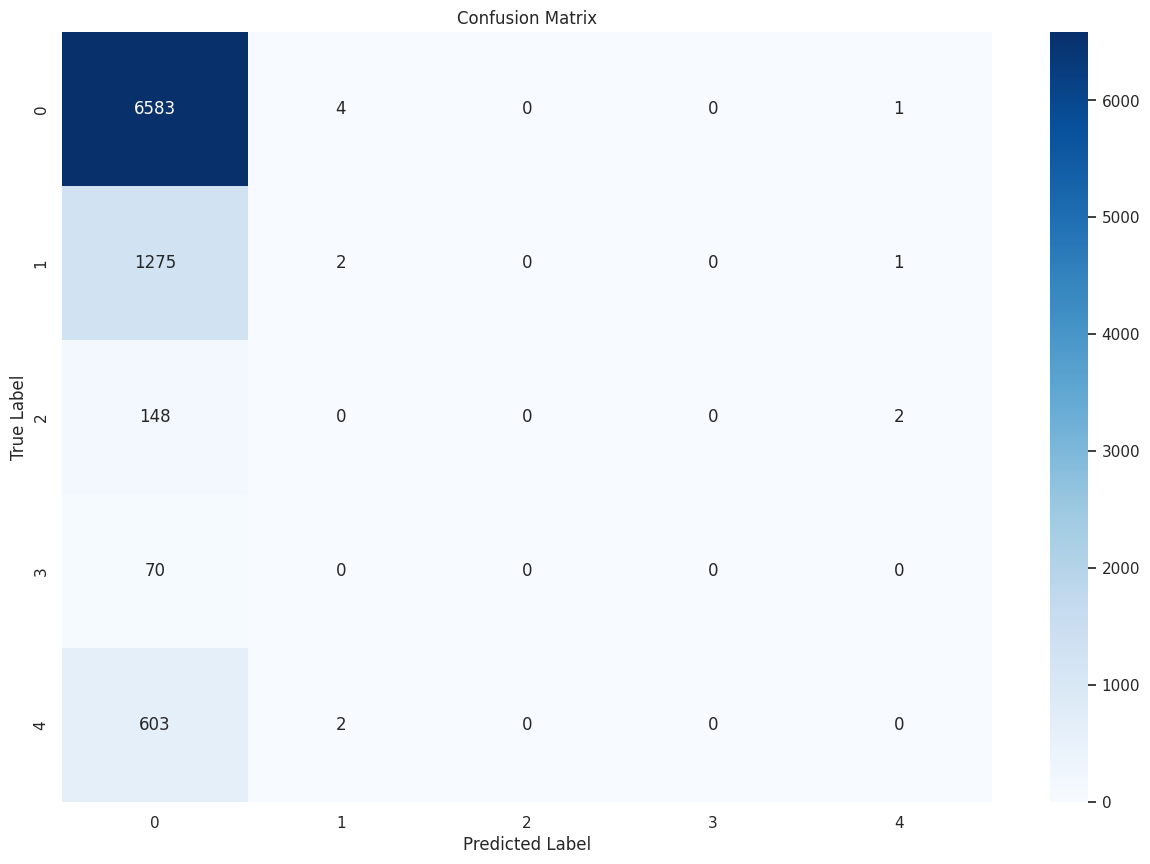

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y_test, predicted_result)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [248]:
precision = precision_score(y_test, predicted_result, average='weighted')
print(f'Precision: {precision:.2f}')


Precision: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#####d. Recall

In [249]:
recall = recall_score(y_test, predicted_result, average='weighted')
print(f'Recall: {recall:.2f}')


Recall: 0.76


#####e. F1 Score

In [250]:
f1 = f1_score(y_test, predicted_result, average='weighted')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.65


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-251-252f32ece572>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


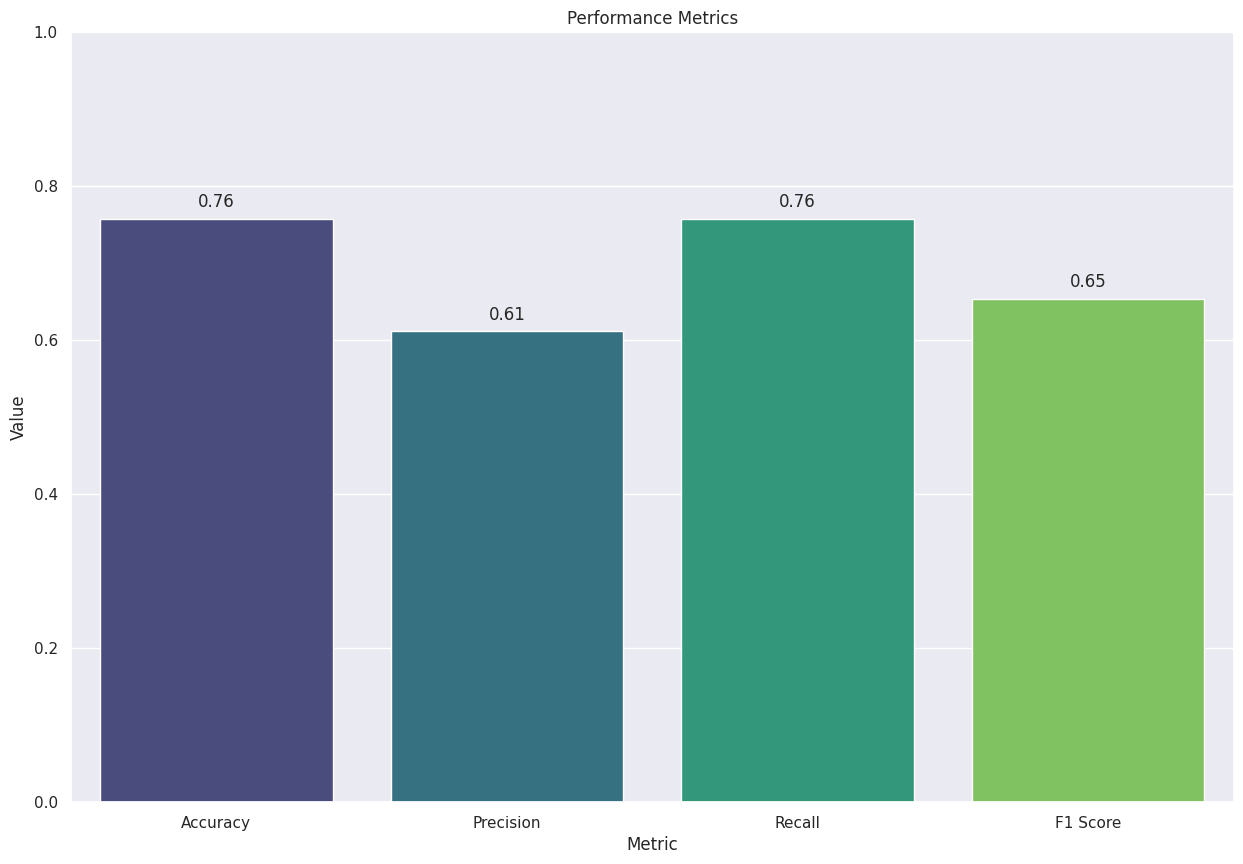

In [251]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Plot Accuracy (y-axis) vs Solver (x-axis)

In [252]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
solver_accuracies = []

for solver in solvers:
    try:
        log_reg = LogisticRegression(solver=solver)
        log_reg.fit(x_train, y_train)
        predicted_result = log_reg.predict(x_test)
        accuracy = accuracy_score(y_test, predicted_result)
        solver_accuracies.append(accuracy)
        print(f"Solver: {solver}, Accuracy: {accuracy:.4f}")
    except Exception as e:
        solver_accuracies.append(np.nan)
        print(f"Solver {solver} raised an error: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Accuracy: 0.7577
Solver: liblinear, Accuracy: 0.7566
Solver: newton-cg, Accuracy: 0.7570
Solver: newton-cholesky, Accuracy: 0.7565


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Accuracy: 0.7564
Solver: saga, Accuracy: 0.7566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


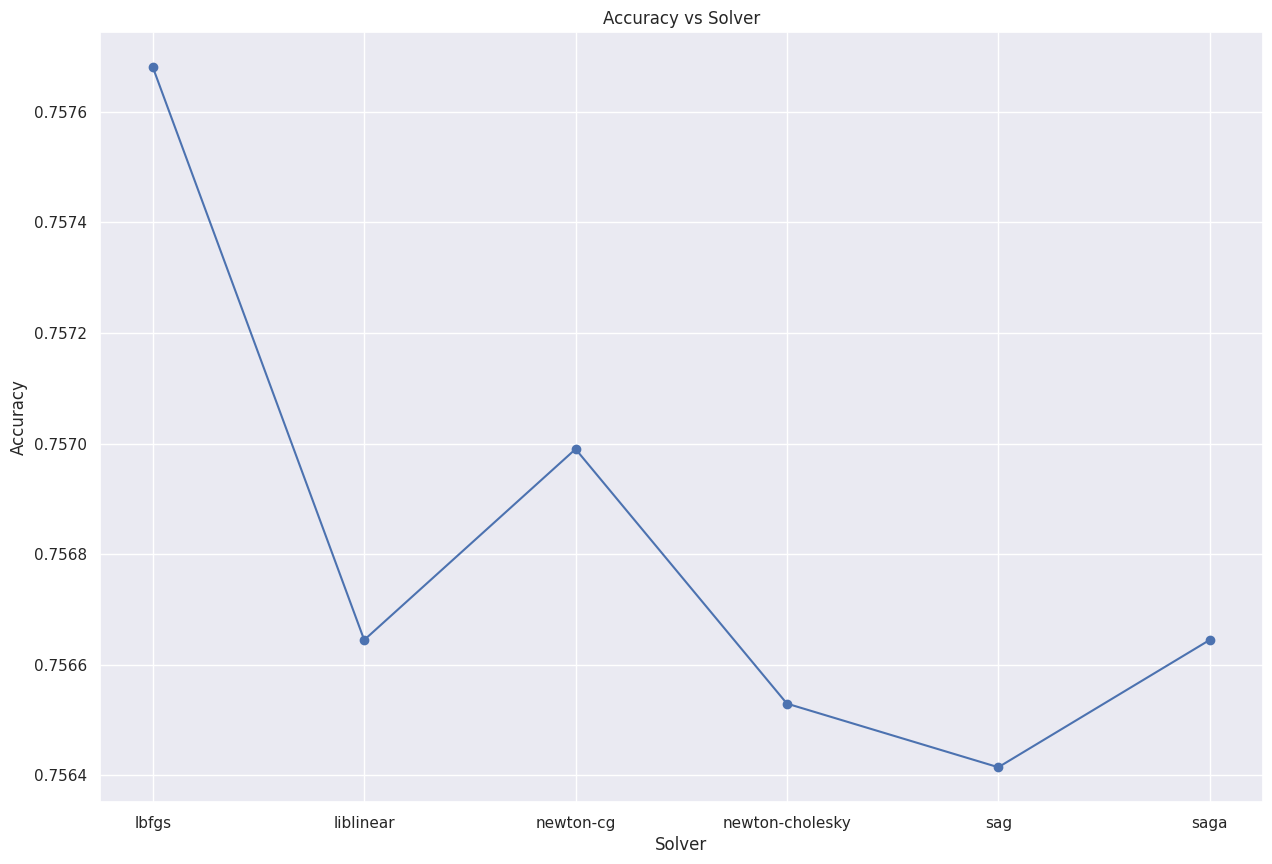

In [253]:
# Plot Accuracy vs Solver
plt.figure(figsize=(15, 10))
plt.plot(solvers, solver_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

####Plot Accuracy (y-axis) vs Max_iter (x-axis)

In [254]:
max_iters = [50, 100, 150, 200, 250, 300]
iter_accuracies = []

for max_iter in max_iters:
    log_reg = LogisticRegression(max_iter=max_iter)
    log_reg.fit(x_train, y_train)
    predicted_result = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, predicted_result)
    iter_accuracies.append(accuracy)
    print(f"Max Iterations: {max_iter}, Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 50, Accuracy: 0.7580


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 100, Accuracy: 0.7577


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 150, Accuracy: 0.7564


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 200, Accuracy: 0.7561


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 250, Accuracy: 0.7563
Max Iterations: 300, Accuracy: 0.7562


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


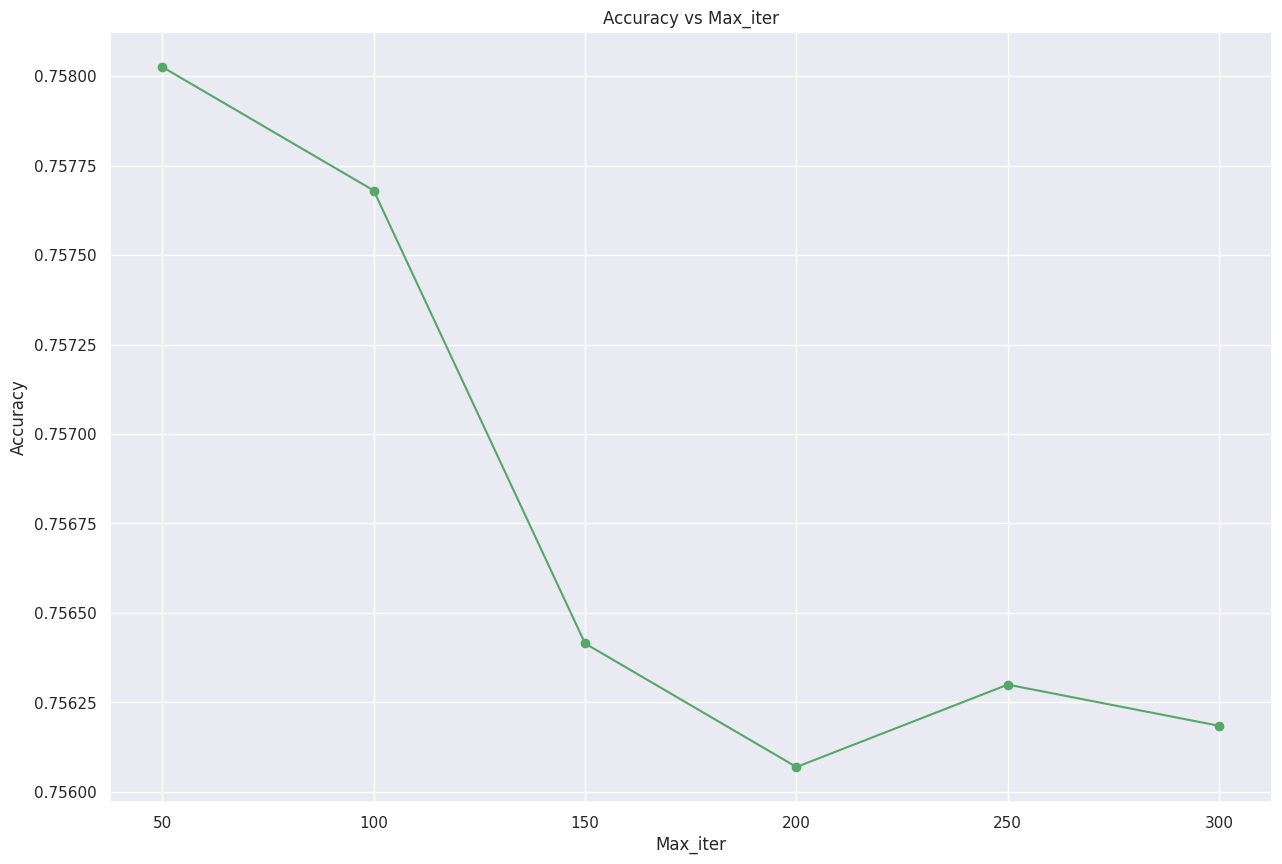

In [255]:
# Plot Accuracy vs Max_iter
plt.figure(figsize=(15, 10))
plt.plot(max_iters, iter_accuracies, marker='o', linestyle='-', color='g')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

##Target Variable Patient Status

###Data Partitioning

In [256]:
x2 = df.drop(columns=['Patient_Status_Ordinal'])

y2 = df['Patient_Status_Ordinal']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=40)

print("x2_train shape:", x2_train.shape)
print("x2_test shape:", x2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

x2_train shape: (34762, 22)
x2_test shape: (8691, 22)
y2_train shape: (34762,)
y2_test shape: (8691,)


###Apply Logistic Regression


####Train Logistic Regression model on the train set

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
log_reg2 = LogisticRegression(random_state=40)
log_reg2.fit(x2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [259]:
log_reg2.score(x2_train, y2_train)

0.7252459582302514

In [260]:
log_reg2.score(x2_test, y2_test)

0.7264986767920838

In [261]:
predicted_result2 = log_reg2.predict(x2_test)

####Test the trained model on the test set

In [262]:
predicted_result2 = log_reg2.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

In [263]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


#####a. Accuracy

In [264]:
accuracy2 = accuracy_score(y2_test, predicted_result2)
print(f'Accuracy2: {accuracy2:.2f}')


Accuracy2: 0.73


#####b. Confusion Matrix

In [265]:
conf_matrix2 = confusion_matrix(y2_test, predicted_result2)
print('Confusion Matrix2:')
print(conf_matrix2)


Confusion Matrix2:
[[2665 1709   13]
 [ 563 3643    1]
 [  88    3    6]]


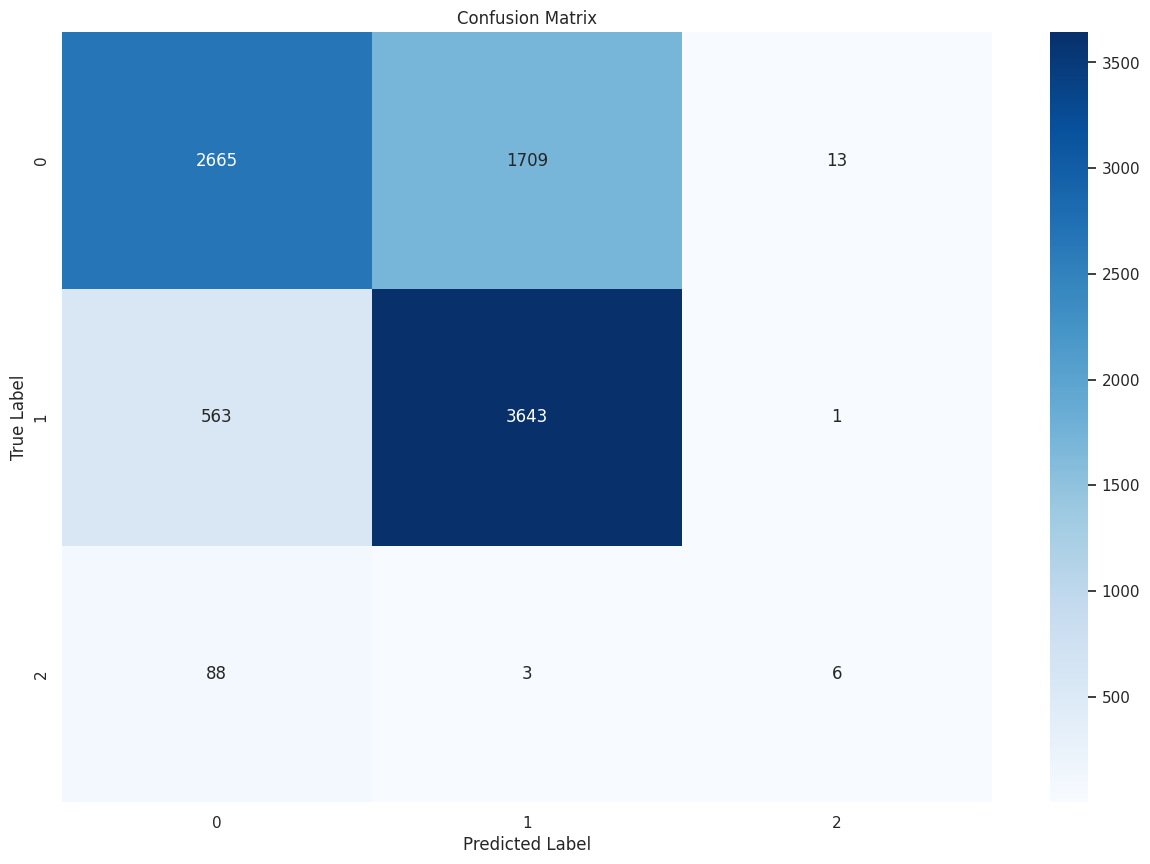

In [266]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y2_test, predicted_result2)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [267]:
precision2 = precision_score(y2_test, predicted_result2, average='weighted')
print(f'Precision2: {precision2:.2f}')


Precision2: 0.74


#####d. Recall

In [268]:
recall2 = recall_score(y2_test, predicted_result2, average='weighted')
print(f'Recall2: {recall2:.2f}')


Recall2: 0.73


#####e. F1 Score

In [269]:
Psf1 = f1_score(y2_test, predicted_result2, average='weighted')
print(f'F1 Score: {Psf1:.2f}')


F1 Score: 0.72


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-270-a45f826cbed8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


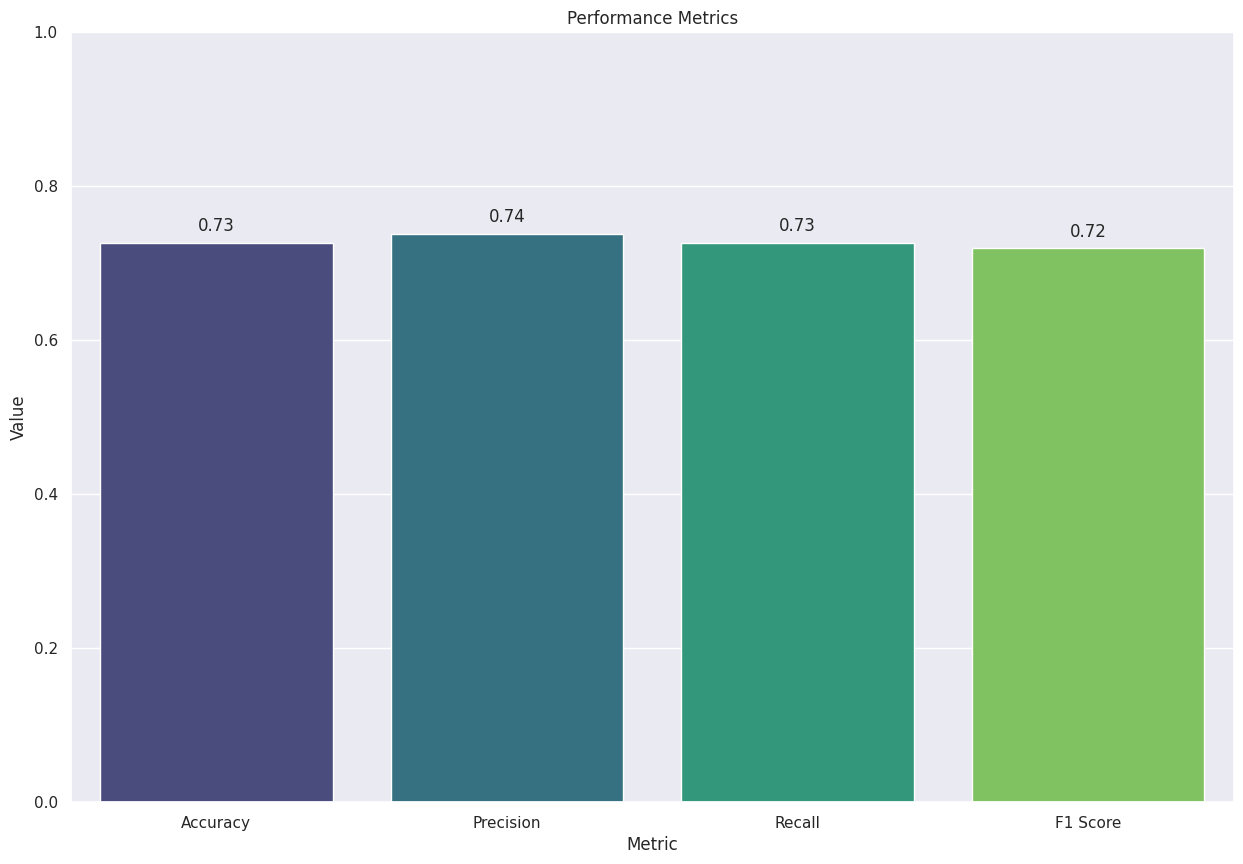

In [270]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy2, 'Precision': precision2, 'Recall': recall2, 'F1 Score': Psf1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Plot Accuracy (y-axis) vs Solver (x-axis)

In [271]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
solver_accuracies = []

for solver in solvers:
    try:
        log_reg2 = LogisticRegression(solver=solver)
        log_reg2.fit(x2_train, y2_train)
        predicted_result2 = log_reg2.predict(x2_test)
        accuracy2 = accuracy_score(y2_test, predicted_result2)
        solver_accuracies.append(accuracy2)
        print(f"Solver: {solver}, Accuracy: {accuracy2:.4f}")
    except Exception as e:
        solver_accuracies.append(np.nan)
        print(f"Solver {solver} raised an error: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Accuracy: 0.7265
Solver: liblinear, Accuracy: 0.7296
Solver: newton-cg, Accuracy: 0.7293
Solver: newton-cholesky, Accuracy: 0.7295


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Accuracy: 0.7289
Solver: saga, Accuracy: 0.7286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


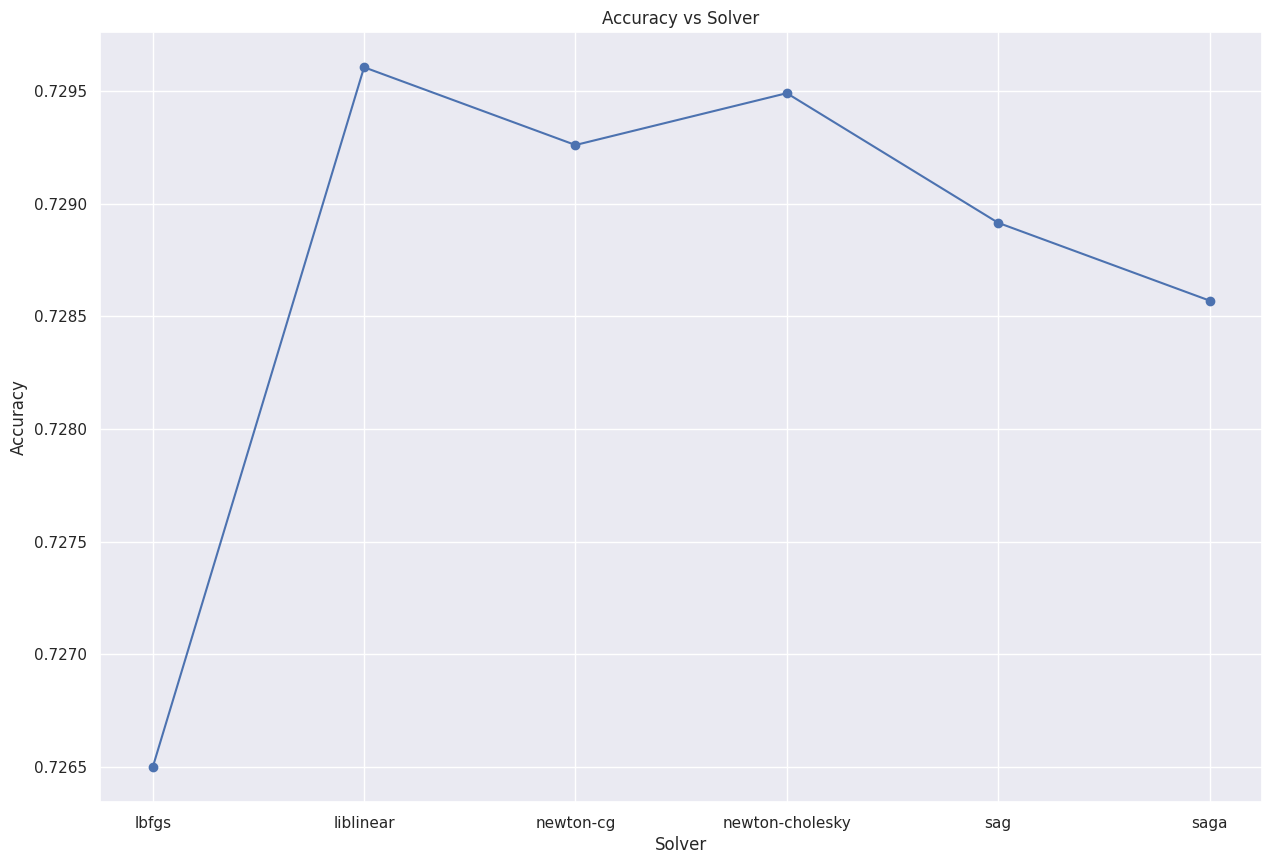

In [272]:
# Plot Accuracy vs Solver
plt.figure(figsize=(15, 10))
plt.plot(solvers, solver_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

####Plot Accuracy (y-axis) vs Max_iter (x-axis)

In [273]:
max_iters = [50, 100, 150, 200, 250, 300]
iter_accuracies = []

for max_iter in max_iters:
    log_reg2 = LogisticRegression(max_iter=max_iter)
    log_reg2.fit(x2_train, y2_train)
    predicted_result2 = log_reg2.predict(x2_test)
    accuracy2 = accuracy_score(y2_test, predicted_result2)
    iter_accuracies.append(accuracy2)
    print(f"Max Iterations: {max_iter}, Accuracy: {accuracy2:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 50, Accuracy: 0.7203


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 100, Accuracy: 0.7265


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 150, Accuracy: 0.7288


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 200, Accuracy: 0.7286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 250, Accuracy: 0.7285
Max Iterations: 300, Accuracy: 0.7283


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


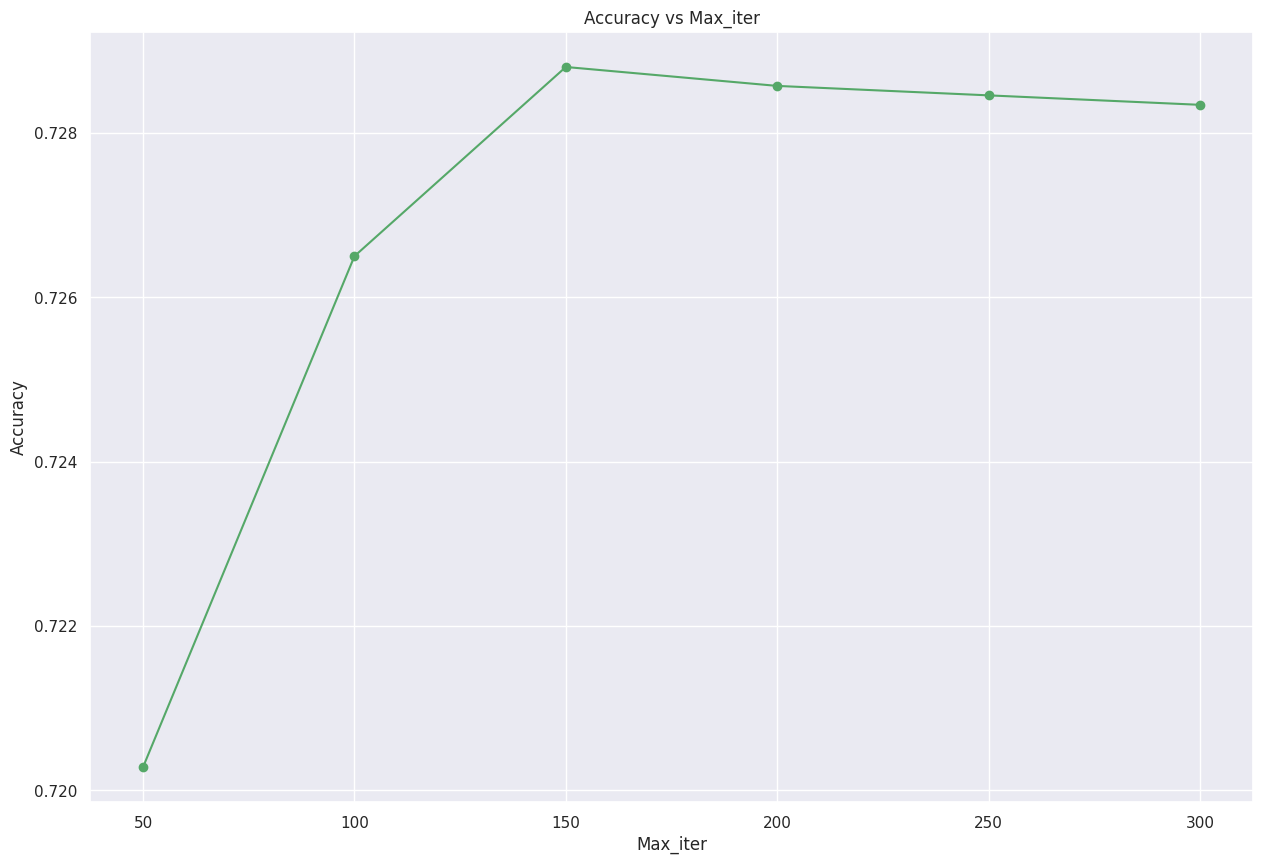

In [274]:
# Plot Accuracy vs Max_iter
plt.figure(figsize=(15, 10))
plt.plot(max_iters, iter_accuracies, marker='o', linestyle='-', color='g')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()